In [2]:
import camb
from camb import model, initialpower
import pysm3
import pysm3.units as u
import healpy as hp
import numpy as np
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import math

np.set_printoptions(16)

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
Nside=512
#sky = pysm3.Sky(nside=Nside, preset_strings=["d1", "s1"])  #128 Inside is not adequate for 30' resolution
#sky=hp.ud_grade(hp.read_map('galactic_emission_140GHz.fits',(0,1,2)),Nside)

In [5]:
cmb = pysm3.Sky(nside=Nside, preset_strings=["c1"])  

In [6]:
map_90GHzRJ = pysm3.Sky(nside=Nside, preset_strings=["d1", "s1"]).get_emission(90 * u.GHz)
map_93GHzRJ = pysm3.Sky(nside=Nside, preset_strings=["d1", "s1"]).get_emission(93 * u.GHz)
map_95GHzRJ = pysm3.Sky(nside=Nside, preset_strings=["d1", "s1"]).get_emission(95 * u.GHz)
map_100GHzRJ = pysm3.Sky(nside=Nside, preset_strings=["d1", "s1"]).get_emission(100 * u.GHz)
map_140GHzRJ = pysm3.Sky(nside=Nside, preset_strings=["d1", "s1"]).get_emission(140 * u.GHz)
map_145GHzRJ = pysm3.Sky(nside=Nside, preset_strings=["d1", "s1"]).get_emission(145 * u.GHz)
map_155GHzRJ = pysm3.Sky(nside=Nside, preset_strings=["d1", "s1"]).get_emission(155 * u.GHz)
map_195GHzRJ = pysm3.Sky(nside=Nside, preset_strings=["d1", "s1"]).get_emission(195 * u.GHz)
map_220GHzRJ = pysm3.Sky(nside=Nside, preset_strings=["d1", "s1"]).get_emission(220 * u.GHz)
map_223GHzRJ = pysm3.Sky(nside=Nside, preset_strings=["d1", "s1"]).get_emission(223 * u.GHz)
map_225GHzRJ = pysm3.Sky(nside=Nside, preset_strings=["d1", "s1"]).get_emission(225 * u.GHz)

In [7]:
map_90GHz = map_100GHzRJ.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(90*u.GHz)) #convert
map_93GHz = map_100GHzRJ.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(93*u.GHz))
map_95GHz = map_100GHzRJ.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(95*u.GHz))
map_100GHz = map_100GHzRJ.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(100*u.GHz))
map_140GHz = map_100GHzRJ.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(140*u.GHz))
map_145GHz = map_100GHzRJ.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(145*u.GHz))
map_155GHz = map_100GHzRJ.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(155*u.GHz))
map_195GHz = map_100GHzRJ.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(195*u.GHz))
map_220GHz = map_100GHzRJ.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(220*u.GHz))
map_223GHz = map_100GHzRJ.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(223*u.GHz))
map_225GHz = map_100GHzRJ.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(225*u.GHz))

In [8]:
cmbmap_140GHzRJ = cmb.get_emission(140 * u.GHz)
cmbmap_140GHz = cmbmap_140GHzRJ.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(140*u.GHz)) #convert

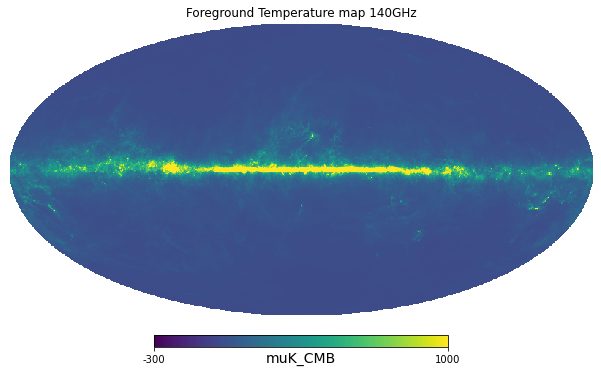

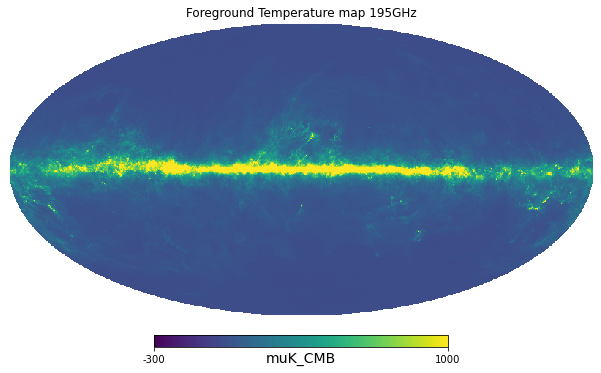

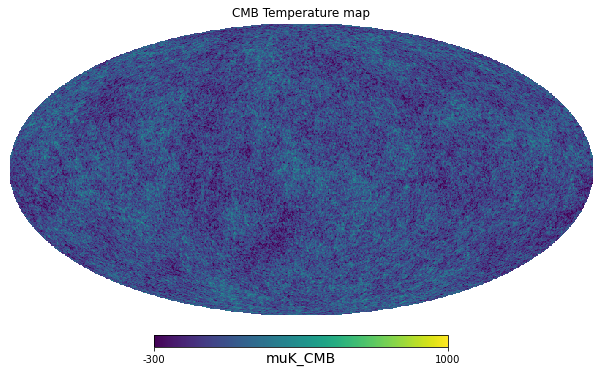

In [9]:
hp.mollview(map_140GHz[0], min=-3e2, max=1e3, title="Foreground Temperature map 140GHz",unit='muK_CMB')
hp.mollview(map_195GHz[0], min=-3e2, max=1e3, title="Foreground Temperature map 195GHz",unit='muK_CMB')
hp.mollview(cmbmap_140GHz[0], min=-3e2, max=1e3, title="CMB Temperature map",unit='muK_CMB')

# LiteBIRD

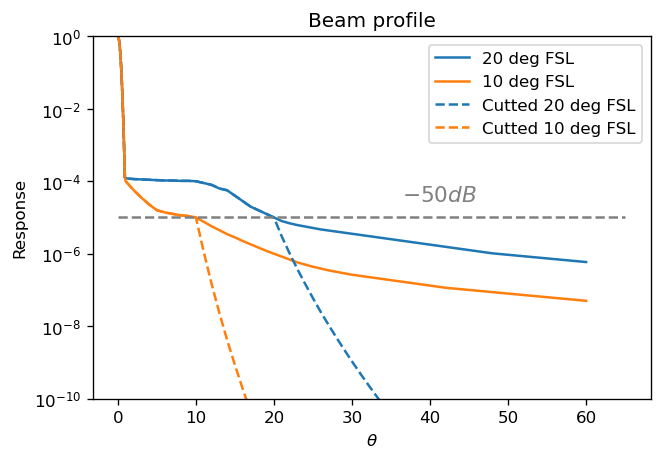

In [10]:
# Beam window non gaussian       LiteBIRD

bigtheta=np.arange(1,61,1)
smalltheta=np.arange(0,0.9,0.0001)
theta=np.append(smalltheta, bigtheta)
theta_rad=np.pi/180*theta

central_gauss_beam=np.exp(-1/2*smalltheta*smalltheta/0.21237/0.21237)  
# sigma is calculated using gauss function and two dots(0,1) and (0.9,-39dB) or from the FWHM=2.355

sidelobe20FSL=pow(10,np.array([-3.92,-3.94,-3.95,-3.96,-3.97,-3.98,-3.98,-3.99,-3.99,-4,-4.05,-4.1,-4.2,-4.25,-4.4,-4.55,-4.7,-4.8,-4.9,-5,-5.1,-5.16,-5.21,-5.25,-5.29,-5.33,-5.36,-5.39,-5.42,-5.45,-5.48,-5.51,-5.54,-5.57,-5.6,-5.63,-5.66,-5.69,-5.72,-5.75,-5.78,-5.81,-5.84,-5.87,-5.9,-5.93,-5.96,-5.99,-6.01,-6.03,-6.05,-6.07,-6.09,-6.11,-6.13,-6.15,-6.17,-6.19,-6.21,-6.23]))
sidelobe10FSL=pow(10,np.array([-4,-4.24,-4.45,-4.64,-4.8,-4.86,-4.9,-4.94,-4.96,-5,-5.12,-5.24,-5.35,-5.46,-5.55,-5.65,-5.74,-5.83,-5.92,-6,-6.08,-6.16,-6.24,-6.3,-6.36,-6.41,-6.46,-6.5,-6.54,-6.58,-6.61,-6.64,-6.67,-6.7,-6.73,-6.76,-6.79,-6.82,-6.85,-6.88,-6.91,-6.94,-6.96,-6.98,-7,-7.02,-7.04,-7.06,-7.08,-7.1,-7.12,-7.14,-7.16,-7.18,-7.2,-7.22,-7.24,-7.26,-7.28,-7.3]))

#cut at -50dB, following value is diminished
cut_sidelobe20FSL=np.append(sidelobe20FSL[0:20],sidelobe20FSL[20:60]*(20/(np.arange(20,60,1)+1))**20)
cut_sidelobe10FSL=np.append(sidelobe10FSL[0:10],sidelobe10FSL[10:60]*(10/(np.arange(10,60,1)+1))**20)


beam20FSL=np.append(central_gauss_beam,sidelobe20FSL)
beam10FSL=np.append(central_gauss_beam,sidelobe10FSL)
cutbeam20FSL=np.append(central_gauss_beam,cut_sidelobe20FSL)
cutbeam10FSL=np.append(central_gauss_beam,cut_sidelobe10FSL)

plt.figure(dpi=120)
plt.plot(theta,beam20FSL)
plt.plot(theta,beam10FSL)
plt.plot(theta,cutbeam20FSL,c='C0',linestyle='dashed')
plt.plot(theta,cutbeam10FSL,c='C1',linestyle='dashed')
plt.plot([0, 65], [0.00001, 0.00001], color='grey', linestyle='--', linewidth=1.5)
plt.annotate(r'$-50 dB$',xy=(30,0.00001),xytext=(+30,+10),textcoords='offset points',fontsize=13,color='grey')
plt.title('Beam profile')
plt.xlabel(r'$\theta$')
plt.ylabel('Response')
plt.ylim([0.0000000001,1])
plt.legend(['20 deg FSL','10 deg FSL','Cutted 20 deg FSL','Cutted 10 deg FSL'])

plt.yscale('log')

plt.show()

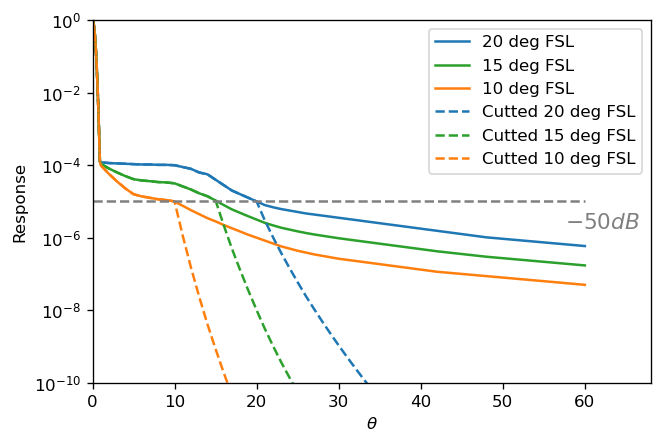

In [11]:
# linear combination of 2 beam, 10FSL and 20FSL,  combined in decibel regime
sidelobe15FSL= pow(10,0.5*np.log10(sidelobe20FSL)+0.5*np.log10(sidelobe10FSL))

beam15FSL=np.append(central_gauss_beam,sidelobe15FSL)

cut_sidelobe15FSL=np.append(pow(10,(0.5*np.log10(sidelobe20FSL)+0.5*np.log10(sidelobe10FSL))[0:15]),pow(10,(0.5*np.log10(sidelobe20FSL)+0.5*np.log10(sidelobe10FSL))[15:60])*(15/(np.arange(15,60,1)+1))**20)

cutbeam15FSL=np.append(central_gauss_beam,cut_sidelobe15FSL)

plt.figure(dpi=120)
plt.plot(theta,beam20FSL)
plt.plot(theta,beam15FSL,c='C2')
plt.plot(theta,beam10FSL)
plt.plot(theta,cutbeam20FSL,c='C0',linestyle='dashed')
plt.plot(theta,cutbeam15FSL,c='C2',linestyle='dashed')
plt.plot(theta,cutbeam10FSL,c='C1',linestyle='dashed')

plt.plot([0, 60], [0.00001, 0.00001], color='grey', linestyle='--', linewidth=1.5)
plt.annotate(r'$-50 dB$',xy=(51.5,0.0000006),xytext=(+30,+10),textcoords='offset points',fontsize=13,color='grey')
#plt.title('Beam profile')
plt.xlabel(r'$\theta$')
plt.ylabel('Response')
plt.xlim([0,68])
plt.ylim([0.0000000001,1])
plt.legend(['20 deg FSL','15 deg FSL','10 deg FSL','Cutted 20 deg FSL','Cutted 15 deg FSL','Cutted 10 deg FSL'])

plt.yscale('log')

plt.show()

In [11]:
# from scipy import interpolate
# # Beam window non gaussian    Patricio's choice      LiteBIRD

# np.set_printoptions(16)
# pat_bigtheta=np.array([0.9,10,20,30,80,90,180])
# pat_theta=np.append(smalltheta, pat_bigtheta)
# pat_theta_rad=np.pi/180*pat_theta

# #new bigtheta to 179.9 deg for precision
# bigtheta180=np.arange(0.9,180,0.01)
# theta180=np.append(smalltheta, bigtheta180)
# theta_rad180=np.pi/180*theta180


# central_gauss_beam=np.exp(-1/2*smalltheta**2/0.21237**2)  
# # sigma is calculated using gauss function and two dots(0,1) and (0.9,-39dB) or from the FWHM=2.355

# pat_sidelobe20FSLdb=np.array([-3.9,-4,-5,-5.5,-7,-7.5,-10])
# pat_sidelobe10FSLdb=np.array([-3.9,-5,-6,-6.5,-8,-8.5,-11])
# #interpolate IN DB
# sidelobe20FSL1func=interpolate.interp1d(pat_bigtheta,pat_sidelobe20FSLdb,kind='cubic')
# sidelobe10FSL1func=interpolate.interp1d(pat_bigtheta,pat_sidelobe10FSLdb,kind='cubic')

# sidelobe20FSL1=pow(10,sidelobe20FSL1func(bigtheta180))
# sidelobe10FSL1=pow(10,sidelobe10FSL1func(bigtheta180))

# #cut at -50dB, following > f_cut(theta >= theta_cut) = f_all(theta >= theta_cut).*( theta(theta ==> theta_cut)./theta(theta >= theta_cut)).^20;>> similarly for the profile y2, but in this case theta_cut = 20 degrees
# pat_cut_sidelobe20FSL=np.append(pow(10,sidelobe20FSL1func(np.arange(0.9,20.001,0.01))),pow(10,sidelobe20FSL1func(np.arange(20.01,180,0.01)))*(20/np.arange(20.01,180,0.01))**20)
# pat_cut_sidelobe10FSL=np.append(pow(10,sidelobe10FSL1func(np.arange(0.9,10.001,0.01))),pow(10,sidelobe10FSL1func(np.arange(10.01,180,0.01)))*(10/np.arange(10.01,180,0.01))**20)

# pat_beam20FSL=np.append(central_gauss_beam,sidelobe20FSL1)
# pat_beam10FSL=np.append(central_gauss_beam,sidelobe10FSL1)
# pat_cutbeam20FSL=np.append(central_gauss_beam,pat_cut_sidelobe20FSL)
# pat_cutbeam10FSL=np.append(central_gauss_beam,pat_cut_sidelobe10FSL)


# plt.plot(theta180,pat_beam20FSL)
# plt.plot(theta180,pat_beam10FSL)
# plt.plot(theta180,pat_cutbeam20FSL,c='C0',linestyle='dashed')
# plt.plot(theta180,pat_cutbeam10FSL,c='C1',linestyle='dashed')
# plt.title('Beam profile')
# plt.xlabel(r'$\theta$')
# plt.ylabel('Beam')
# plt.ylim([0.00000001,1])
# plt.xlim([-1,60])
# plt.legend(['20 deg FSL','10 deg FSL','Cut 20 deg FSL','Cut 10 deg FSL'])


# plt.yscale('log')

# plt.show()

In [32]:
#beam to spherical harmonic
bl20FSL=hp.sphtfunc.beam2bl(beam20FSL, theta_rad, lmax=3*Nside)#HERE lmax is important, choose the same as the map's lmax
bl20FSL=bl20FSL/bl20FSL[0]                                    #NORMALIZATION ???

bl10FSL=hp.sphtfunc.beam2bl(beam10FSL, theta_rad, lmax=3*Nside)
bl10FSL=bl10FSL/bl10FSL[0]                                   #NORMALIZATION ???

cutbl20FSL=hp.sphtfunc.beam2bl(cutbeam20FSL, theta_rad, lmax=3*Nside)
cutbl20FSL=cutbl20FSL/cutbl20FSL[0]                                   #NORMALIZATION ???

cutbl10FSL=hp.sphtfunc.beam2bl(cutbeam10FSL, theta_rad, lmax=3*Nside)
cutbl10FSL=cutbl10FSL/cutbl10FSL[0]

bl15FSL=hp.sphtfunc.beam2bl(beam15FSL, theta_rad, lmax=3*Nside)
bl15FSL=bl15FSL/bl15FSL[0]                                   #NORMALIZATION ???

cutbl15FSL=hp.sphtfunc.beam2bl(cutbeam15FSL, theta_rad, lmax=3*Nside)
cutbl15FSL=cutbl15FSL/cutbl15FSL[0]

#beam to spherical harmonic
#pat_bl20FSL=hp.sphtfunc.beam2bl(pat_beam20FSL, theta_rad180, lmax=3*Nside)#HERE lmax is important, choose the same as the map's lmax
#pat_bl20FSL=pat_bl20FSL/pat_bl20FSL[0]                                    #NORMALIZATION ???

#pat_bl10FSL=hp.sphtfunc.beam2bl(pat_beam10FSL, theta_rad180, lmax=3*Nside)
#pat_bl10FSL=pat_bl10FSL/pat_bl10FSL[0]                                   #NORMALIZATION ???

#pat_cutbl20FSL=hp.sphtfunc.beam2bl(pat_cutbeam20FSL, theta_rad180, lmax=3*Nside)
#pat_cutbl20FSL=cutbl20FSL/cutbl20FSL[0]                                   #NORMALIZATION ???

#pat_cutbl10FSL=hp.sphtfunc.beam2bl(pat_cutbeam10FSL, theta_rad180, lmax=3*Nside)
#pat_cutbl10FSL=pat_cutbl10FSL/pat_cutbl10FSL[0]                                   #NORMALIZATION ???

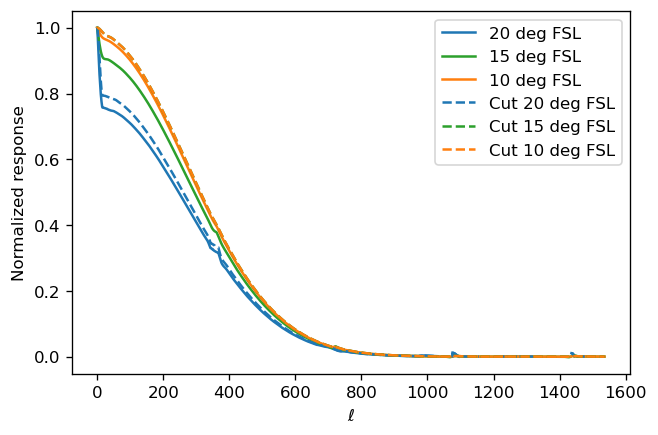

In [33]:
from scipy import signal

bl20FSL_filtered=np.copy(bl20FSL)
bl20FSL_filtered=np.exp(signal.medfilt(np.log(bl20FSL),kernel_size=201))     #for good looking in plot

cutbl20FSL_filtered=np.copy(cutbl20FSL)
cutbl20FSL_filtered=np.exp(signal.medfilt(np.log(cutbl20FSL),kernel_size=201))

plt.figure(dpi=120)
plt.plot(np.arange(3*Nside+1),bl20FSL_filtered)
plt.plot(np.arange(3*Nside+1),bl15FSL,c='C2')
plt.plot(np.arange(3*Nside+1),bl10FSL)
plt.plot(np.arange(3*Nside+1),cutbl20FSL_filtered,c='C0',linestyle='dashed')
plt.plot(np.arange(3*Nside+1),cutbl10FSL,c='C2',linestyle='dashed')
plt.plot(np.arange(3*Nside+1),cutbl10FSL,c='C1',linestyle='dashed')
#plt.title('Normalized beam profile in multipoles')
plt.xlabel(r'$\ell$')
plt.ylabel('Normalized response')
plt.legend(['20 deg FSL','15 deg FSL','10 deg FSL','Cut 20 deg FSL','Cut 15 deg FSL','Cut 10 deg FSL'])

plt.show()

In [34]:
#Smoothing the d1 s1 fore ground IQU, 100GHz
map_100GHz_sm20FSL=hp.sphtfunc.smoothing(map_100GHz,beam_window=bl20FSL)
map_100GHz_sm10FSL=hp.sphtfunc.smoothing(map_100GHz,beam_window=bl10FSL)
map_100GHz_smcut20FSL=hp.sphtfunc.smoothing(map_100GHz,beam_window=cutbl20FSL)
map_100GHz_smcut10FSL=hp.sphtfunc.smoothing(map_100GHz,beam_window=cutbl10FSL)
map_100GHz_sm15FSL=hp.sphtfunc.smoothing(map_100GHz,beam_window=bl15FSL)
map_100GHz_smcut15FSL=hp.sphtfunc.smoothing(map_100GHz,beam_window=cutbl15FSL)

#Smoothing the d1 s1 fore ground IQU, 140GHz
map_140GHz_sm20FSL=hp.sphtfunc.smoothing(map_140GHz,beam_window=bl20FSL)
map_140GHz_sm10FSL=hp.sphtfunc.smoothing(map_140GHz,beam_window=bl10FSL)
map_140GHz_smcut20FSL=hp.sphtfunc.smoothing(map_140GHz,beam_window=cutbl20FSL)
map_140GHz_smcut10FSL=hp.sphtfunc.smoothing(map_140GHz,beam_window=cutbl10FSL)
map_140GHz_sm15FSL=hp.sphtfunc.smoothing(map_140GHz,beam_window=bl15FSL)
map_140GHz_smcut15FSL=hp.sphtfunc.smoothing(map_140GHz,beam_window=cutbl15FSL)

#Smoothing the d1 s1 fore ground IQU, 195GHz
map_195GHz_sm20FSL=hp.sphtfunc.smoothing(map_195GHz,beam_window=bl20FSL)
map_195GHz_sm10FSL=hp.sphtfunc.smoothing(map_195GHz,beam_window=bl10FSL)
map_195GHz_smcut20FSL=hp.sphtfunc.smoothing(map_195GHz,beam_window=cutbl20FSL)
map_195GHz_smcut10FSL=hp.sphtfunc.smoothing(map_195GHz,beam_window=cutbl10FSL)
map_195GHz_sm15FSL=hp.sphtfunc.smoothing(map_195GHz,beam_window=bl15FSL)
map_195GHz_smcut15FSL=hp.sphtfunc.smoothing(map_195GHz,beam_window=cutbl15FSL)




#noises, caused buty inaccurate beam cut, namely the difference
noises_map_100GHz_20FSL=map_100GHz_sm20FSL-map_100GHz_smcut20FSL
noises_map_100GHz_10FSL=map_100GHz_sm10FSL-map_100GHz_smcut10FSL
noises_map_100GHz_15FSL=map_100GHz_sm15FSL-map_100GHz_smcut15FSL

noises_map_140GHz_20FSL=map_140GHz_sm20FSL-map_140GHz_smcut20FSL
noises_map_140GHz_10FSL=map_140GHz_sm10FSL-map_140GHz_smcut10FSL
noises_map_140GHz_15FSL=map_140GHz_sm15FSL-map_140GHz_smcut15FSL

noises_map_195GHz_20FSL=map_195GHz_sm20FSL-map_195GHz_smcut20FSL
noises_map_195GHz_10FSL=map_195GHz_sm10FSL-map_195GHz_smcut10FSL
noises_map_195GHz_15FSL=map_195GHz_sm15FSL-map_195GHz_smcut15FSL

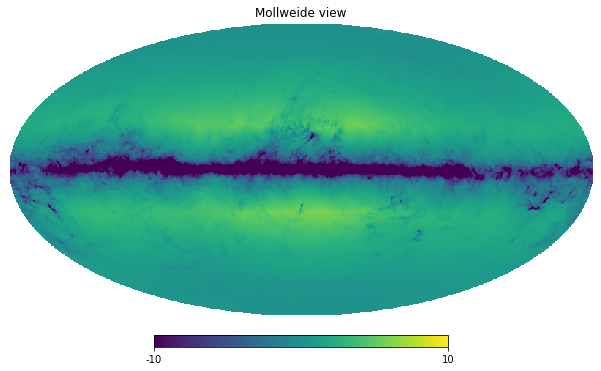

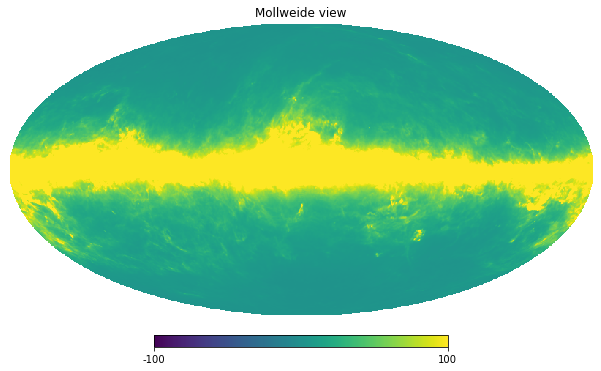

In [35]:
# how noise looks like
hp.mollview(noises_map_100GHz_20FSL[0],min=-10, max=10)


hp.mollview(map_100GHz_sm20FSL[0],min=-100, max=100)

## MASK

In [17]:
# The value of the noise is too big, shall we consider mask?

In [18]:
m_apomask=hp.ud_grade(hp.fitsfunc.read_map('mask_planck_apo2_n2048_0p60pc.fits'),Nside)

In [19]:
np.count_nonzero(m_apomask)/len(m_apomask)

0.5920804341634115

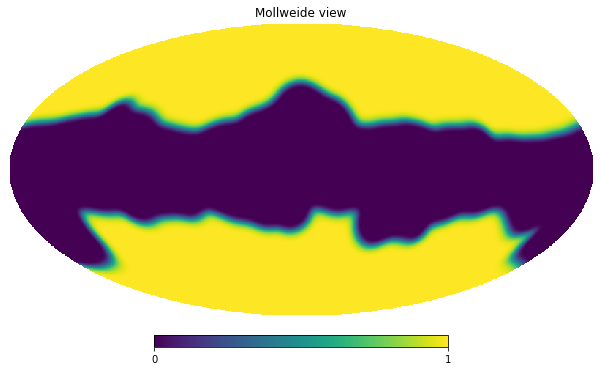

In [20]:
#mask are giving tails, hp.ma has some trouble. try multiply the mask and try CMB,
hp.mollview(m_apomask)

In [40]:
noises_map_100GHz_20FSL_mmasked=noises_map_100GHz_20FSL*m_apomask
noises_map_100GHz_10FSL_mmasked=noises_map_100GHz_10FSL*m_apomask
noises_map_100GHz_15FSL_mmasked=noises_map_100GHz_15FSL*m_apomask

noises_map_140GHz_20FSL_mmasked=noises_map_140GHz_20FSL*m_apomask
noises_map_140GHz_10FSL_mmasked=noises_map_140GHz_10FSL*m_apomask
noises_map_140GHz_15FSL_mmasked=noises_map_140GHz_15FSL*m_apomask

noises_map_195GHz_20FSL_mmasked=noises_map_195GHz_20FSL*m_apomask
noises_map_195GHz_10FSL_mmasked=noises_map_195GHz_10FSL*m_apomask
noises_map_195GHz_15FSL_mmasked=noises_map_195GHz_15FSL*m_apomask


# #Patricio's beam
# noises_map_140GHz_pat_20FSL_mmasked=noises_map_140GHz_pat_20FSL*m_apomask
# noises_map_140GHz_pat_10FSL_mmasked=noises_map_140GHz_pat_10FSL*m_apomask
# hp.mollview(noises_map_100GHz_20FSL_mmasked[0])

#Still has some problems because the value in the map is from negative to positive,  a zero-valued mask will be inefective.

In [41]:
#to TEB
noises_map_100GHz_20FSL_mmasked_TEB=hp.anafast(noises_map_100GHz_20FSL_mmasked,pol=True)  
noises_map_100GHz_10FSL_mmasked_TEB=hp.anafast(noises_map_100GHz_10FSL_mmasked,pol=True)  
noises_map_100GHz_15FSL_mmasked_TEB=hp.anafast(noises_map_100GHz_15FSL_mmasked,pol=True)  

noises_map_140GHz_20FSL_mmasked_TEB=hp.anafast(noises_map_140GHz_20FSL_mmasked,pol=True)  
noises_map_140GHz_10FSL_mmasked_TEB=hp.anafast(noises_map_140GHz_10FSL_mmasked,pol=True)
noises_map_140GHz_15FSL_mmasked_TEB=hp.anafast(noises_map_140GHz_15FSL_mmasked,pol=True)


noises_map_195GHz_20FSL_mmasked_TEB=hp.anafast(noises_map_195GHz_20FSL_mmasked,pol=True)  
noises_map_195GHz_10FSL_mmasked_TEB=hp.anafast(noises_map_195GHz_10FSL_mmasked,pol=True)
noises_map_195GHz_15FSL_mmasked_TEB=hp.anafast(noises_map_195GHz_15FSL_mmasked,pol=True)

In [42]:
# #Patricio's beam to TEB
# noises_map_140GHz_pat_20FSL_mmasked_TEB=hp.anafast(noises_map_140GHz_pat_20FSL_mmasked,pol=True)  
# noises_map_140GHz_pat_10FSL_mmasked_TEB=hp.anafast(noises_map_140GHz_pat_10FSL_mmasked,pol=True)   

In [12]:
cp=camb.read_ini('planck_2018_acc_np_params.ini')  
powers=camb.get_results(cp).get_cmb_power_spectra(cp,CMB_unit='muK')  #set unit micro K
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']

#compare with primordial B mode
inflation_params = initialpower.InitialPowerLaw()
inflation_params.set_params( r=0.01)
results = camb.get_transfer_functions(cp)
results.power_spectra_from_transfer(inflation_params)
cl56 = results.get_unlensed_total_cls(1500, CMB_unit='muK')

inflation_params.set_params( r=0.001)
results = camb.get_transfer_functions(cp)
results.power_spectra_from_transfer(inflation_params)
cl01 = results.get_unlensed_total_cls(1500, CMB_unit='muK')

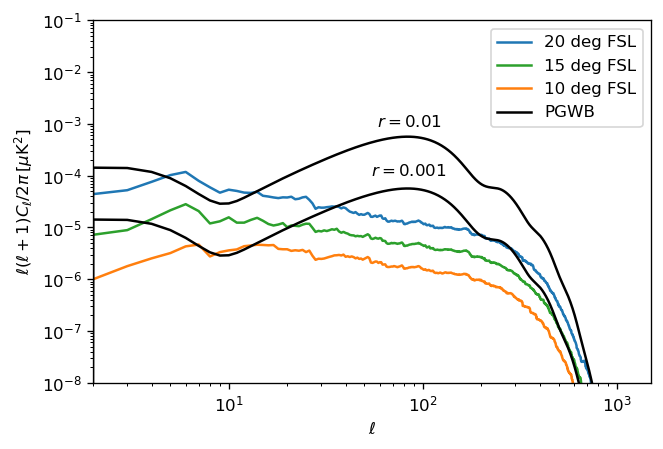

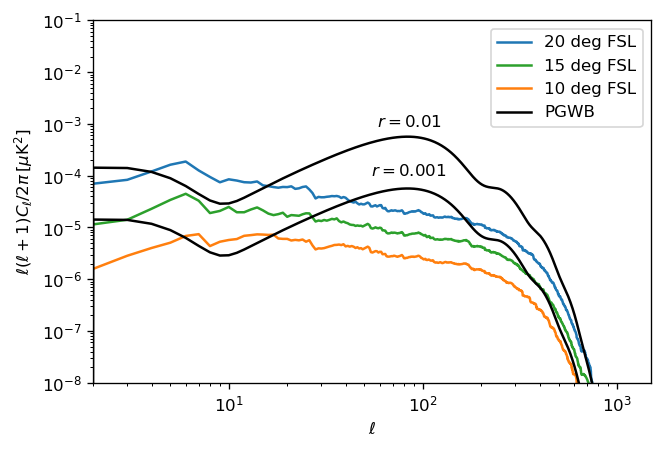

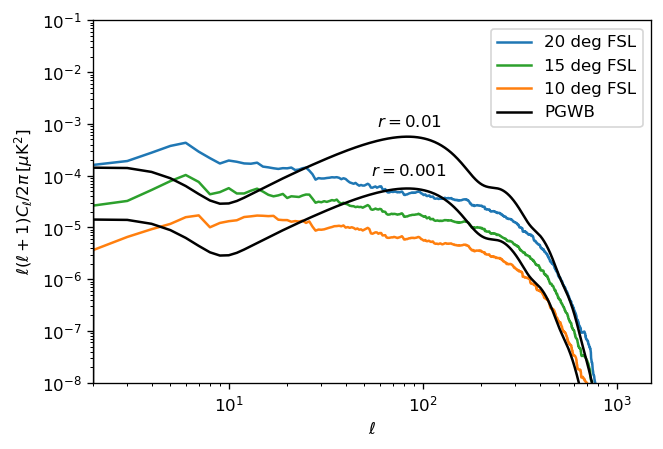

In [44]:
#100GHz

#Filtering the spikes in log regime
from scipy import signal
noises_map_100GHz_20FSL_mmasked_B_filtered=np.exp(signal.medfilt(np.log(noises_map_100GHz_20FSL_mmasked_TEB[2]),kernel_size=101))
noises_map_100GHz_10FSL_mmasked_B_filtered=np.exp(signal.medfilt(np.log(noises_map_100GHz_10FSL_mmasked_TEB[2]),kernel_size=101))
noises_map_100GHz_15FSL_mmasked_B_filtered=np.exp(signal.medfilt(np.log(noises_map_100GHz_15FSL_mmasked_TEB[2]),kernel_size=101))


#ideal antenna with FWHM, for B-mode convolution for the comparison
res=30 #In arcmin, typically for LiteBIRD
FWHM=np.pi*res/60/180
sigma=FWHM/(2*np.sqrt(2*np.log(2)))

def ant(ls):
    return np.exp(-ls*(ls+1)*sigma*sigma)


ls = np.arange(3*Nside)
plt.figure(dpi=120)
plt.plot(ls,ls*(ls+1)*noises_map_100GHz_20FSL_mmasked_B_filtered/2/np.pi,c='C0')
plt.plot(ls,ls*(ls+1)*noises_map_100GHz_15FSL_mmasked_B_filtered/2/np.pi,c='C2')
plt.plot(ls,ls*(ls+1)*noises_map_100GHz_10FSL_mmasked_B_filtered/2/np.pi,c='C1')
plt.plot(np.arange(1501),cl56[:,2]*ant(np.arange(1501)),'black')
plt.plot(np.arange(1501),cl01[:,2]*ant(np.arange(1501)),'black')

plt.annotate(r'$r=0.01$',xy=(32,0.008),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='black')
plt.annotate(r'$r=0.001$',xy=(30,0.0009),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='black')

# plt.title('Noise caused by mismatching beam covering PGWB  @100GHz')
plt.xlim([2,1500])
plt.ylim([0.00000001,0.1])
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi\,[\mu {\rm K}^2]$')
plt.legend(['20 deg FSL','15 deg FSL','10 deg FSL','PGWB']);
plt.xlabel(r'$\ell$');
plt.show()

#Tail not match with primordial BB, but anyway it suppressed the tail





#140GHz
from scipy import signal
noises_map_140GHz_20FSL_mmasked_B_filtered=np.exp(signal.medfilt(np.log(noises_map_140GHz_20FSL_mmasked_TEB[2]),kernel_size=101))
noises_map_140GHz_10FSL_mmasked_B_filtered=np.exp(signal.medfilt(np.log(noises_map_140GHz_10FSL_mmasked_TEB[2]),kernel_size=101))
noises_map_140GHz_15FSL_mmasked_B_filtered=np.exp(signal.medfilt(np.log(noises_map_140GHz_15FSL_mmasked_TEB[2]),kernel_size=101))


plt.figure(dpi=120)
plt.plot(ls,ls*(ls+1)*noises_map_140GHz_20FSL_mmasked_B_filtered/2/np.pi,c='C0')
plt.plot(ls,ls*(ls+1)*noises_map_140GHz_15FSL_mmasked_B_filtered/2/np.pi,c='C2')
plt.plot(ls,ls*(ls+1)*noises_map_140GHz_10FSL_mmasked_B_filtered/2/np.pi,c='C1')
plt.plot(np.arange(1501),cl56[:,2]*ant(np.arange(1501)),'black')
plt.plot(np.arange(1501),cl01[:,2]*ant(np.arange(1501)),'black')

plt.annotate(r'$r=0.01$',xy=(32,0.008),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='black')
plt.annotate(r'$r=0.001$',xy=(30,0.0009),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='black')

# plt.title('Noise caused by mismatching beam covering PGWB  @140GHz')
plt.xlim([2,1500])
plt.ylim([0.00000001,0.1])
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi\,[\mu {\rm K}^2]$')
plt.legend(['20 deg FSL','15 deg FSL','10 deg FSL','PGWB']);
plt.xlabel(r'$\ell$');
plt.show()


#195GHz
from scipy import signal
noises_map_195GHz_20FSL_mmasked_B_filtered=np.exp(signal.medfilt(np.log(noises_map_195GHz_20FSL_mmasked_TEB[2]),kernel_size=101))
noises_map_195GHz_10FSL_mmasked_B_filtered=np.exp(signal.medfilt(np.log(noises_map_195GHz_10FSL_mmasked_TEB[2]),kernel_size=101))
noises_map_195GHz_15FSL_mmasked_B_filtered=np.exp(signal.medfilt(np.log(noises_map_195GHz_15FSL_mmasked_TEB[2]),kernel_size=101))


plt.figure(dpi=120)
plt.plot(ls,ls*(ls+1)*noises_map_195GHz_20FSL_mmasked_B_filtered/2/np.pi,c='C0')
plt.plot(ls,ls*(ls+1)*noises_map_195GHz_15FSL_mmasked_B_filtered/2/np.pi,c='C2')
plt.plot(ls,ls*(ls+1)*noises_map_195GHz_10FSL_mmasked_B_filtered/2/np.pi,c='C1')
plt.plot(np.arange(1501),cl56[:,2]*ant(np.arange(1501)),'black')
plt.plot(np.arange(1501),cl01[:,2]*ant(np.arange(1501)),'black')

plt.annotate(r'$r=0.01$',xy=(32,0.008),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='black')
plt.annotate(r'$r=0.001$',xy=(30,0.0009),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='black')

# plt.title('Noise caused by mismatching beam covering PGWB  @195GHz')
plt.xlim([2,1500])
plt.ylim([0.00000001,0.1])
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi\,[\mu {\rm K}^2]$')
plt.legend(['20 deg FSL','15 deg FSL','10 deg FSL','PGWB']);
plt.xlabel(r'$\ell$');
plt.show()



In [45]:
%store noises_map_140GHz_10FSL_mmasked_B_filtered
%store noises_map_140GHz_20FSL_mmasked_B_filtered
%store noises_map_140GHz_15FSL_mmasked_B_filtered
%store noises_map_100GHz_10FSL_mmasked_B_filtered
%store noises_map_100GHz_20FSL_mmasked_B_filtered
%store noises_map_100GHz_15FSL_mmasked_B_filtered
%store noises_map_195GHz_10FSL_mmasked_B_filtered
%store noises_map_195GHz_20FSL_mmasked_B_filtered
%store noises_map_195GHz_15FSL_mmasked_B_filtered

Stored 'noises_map_140GHz_10FSL_mmasked_B_filtered' (ndarray)
Stored 'noises_map_140GHz_20FSL_mmasked_B_filtered' (ndarray)
Stored 'noises_map_140GHz_15FSL_mmasked_B_filtered' (ndarray)
Stored 'noises_map_100GHz_10FSL_mmasked_B_filtered' (ndarray)
Stored 'noises_map_100GHz_20FSL_mmasked_B_filtered' (ndarray)
Stored 'noises_map_100GHz_15FSL_mmasked_B_filtered' (ndarray)
Stored 'noises_map_195GHz_10FSL_mmasked_B_filtered' (ndarray)
Stored 'noises_map_195GHz_20FSL_mmasked_B_filtered' (ndarray)
Stored 'noises_map_195GHz_15FSL_mmasked_B_filtered' (ndarray)


In [26]:
# #140GHz   Patricio's beam
# #Filtering the spikes in log regime
# from scipy import signal
# noises_map_140GHz_pat_20FSL_mmasked_B_log_filtered=signal.medfilt(np.log(noises_map_140GHz_pat_20FSL_mmasked_TEB[2]),kernel_size=101)
# noises_map_140GHz_pat_10FSL_mmasked_B_log_filtered=signal.medfilt(np.log(noises_map_140GHz_pat_10FSL_mmasked_TEB[2]),kernel_size=101)


# def ant(ls):
#     return pow(2.71821,-ls*(ls+1)*sigma*sigma)

# ls = np.arange(3*Nside)
# plt.plot(ls,ls*(ls+1)*np.exp(noises_map_140GHz_pat_20FSL_mmasked_B_log_filtered)/2/np.pi,c='C0')
# plt.plot(ls,ls*(ls+1)*np.exp(noises_map_140GHz_pat_10FSL_mmasked_B_log_filtered)/2/np.pi,c='C1')
# plt.plot(np.arange(1501),cl56[:,2]*ant(np.arange(1501)),'black')
# plt.plot(np.arange(1501),cl01[:,2]*ant(np.arange(1501)),'grey')
# plt.title('BB Noise caused by mismatching beam covering primordial B modes  140GHz Patricio beam')
# plt.xlim([2,1500])
# plt.ylim([0.00000001,0.1])
# plt.xscale('log')
# plt.yscale('log')
# plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi\,[\mu {\rm K}^2]$')
# plt.legend(['20 deg FSL','10 deg FSL','$BB, r = 0.01$','$BB, r = 0.001$'], loc='lower left');
# plt.xlabel(r'$\ell$');
# plt.show()

## S4 DW & SO LAT 

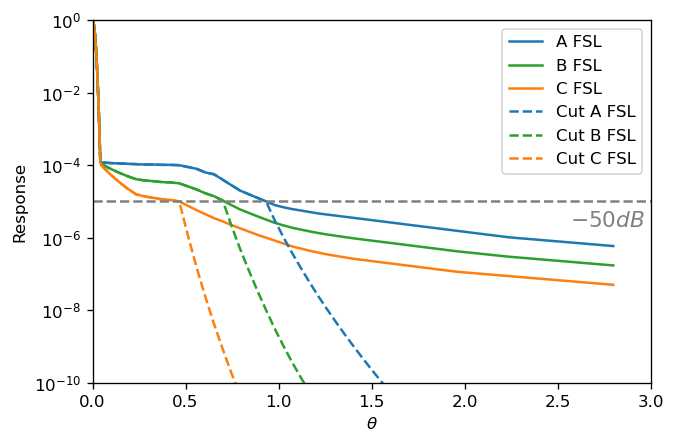

In [25]:
# Beam window non gaussian       S4


FWHM_DW=1.4/60     
sigma_DW=FWHM_DW/2/np.sqrt(2*np.log(2))

smalltheta_DW=np.arange(0,0.04199,0.00001)    #-39dB
theta_DW=np.append(smalltheta_DW,bigtheta*1.4/30)  # shrink the sidelobes
theta_rad_DW=np.pi/180*theta_DW


central_gauss_beam_DW=np.exp(-1/2*smalltheta_DW**2/sigma_DW**2)   # 14 arcmin FHWM


beam20FSL_DW=np.append(central_gauss_beam_DW,sidelobe20FSL)
beam15FSL_DW=np.append(central_gauss_beam_DW,sidelobe15FSL)
beam10FSL_DW=np.append(central_gauss_beam_DW,sidelobe10FSL)
cutbeam20FSL_DW=np.append(central_gauss_beam_DW,cut_sidelobe20FSL)
cutbeam15FSL_DW=np.append(central_gauss_beam_DW,cut_sidelobe15FSL)
cutbeam10FSL_DW=np.append(central_gauss_beam_DW,cut_sidelobe10FSL)


plt.figure(dpi=120)
plt.plot(theta_DW,beam20FSL_DW, c='C0')
plt.plot(theta_DW,beam15FSL_DW, c='C2')
plt.plot(theta_DW,beam10FSL_DW, c='C1')
plt.plot(theta_DW,cutbeam20FSL_DW,c='C0',linestyle='dashed')
plt.plot(theta_DW,cutbeam15FSL_DW,c='C2',linestyle='dashed')
plt.plot(theta_DW,cutbeam10FSL_DW,c='C1',linestyle='dashed')

plt.plot([0, 3], [0.00001, 0.00001], color='grey', linestyle='--', linewidth=1.5)
plt.annotate(r'$-50 dB$',xy=(2.3,0.0000007),xytext=(+30,+10),textcoords='offset points',fontsize=13,color='grey')

#plt.title('Beam profile S4 LAT')
plt.xlabel(r'$\theta$')
plt.ylabel('Response')
plt.xlim([0,3])
plt.ylim([0.0000000001,1])
plt.legend(['A FSL','B FSL','C FSL','Cut A FSL','Cut B FSL','Cut C FSL'])

plt.yscale('log')

plt.show()

In [51]:
#beam to spherical harmonic

bl20FSL_DW=hp.sphtfunc.beam2bl(beam20FSL_DW, theta_rad_DW, lmax=3*Nside)#HERE lmax is important, choose the same as the map's lmax
bl20FSL_DW=bl20FSL_DW/bl20FSL_DW[0]                                    

bl15FSL_DW=hp.sphtfunc.beam2bl(beam15FSL_DW, theta_rad_DW, lmax=3*Nside)
bl15FSL_DW=bl15FSL_DW/bl15FSL_DW[0]

bl10FSL_DW=hp.sphtfunc.beam2bl(beam10FSL_DW, theta_rad_DW, lmax=3*Nside)
bl10FSL_DW=bl10FSL_DW/bl10FSL_DW[0]                                   



cutbl20FSL_DW=hp.sphtfunc.beam2bl(cutbeam20FSL_DW, theta_rad_DW, lmax=3*Nside)
cutbl20FSL_DW=cutbl20FSL_DW/cutbl20FSL_DW[0]           

cutbl15FSL_DW=hp.sphtfunc.beam2bl(cutbeam15FSL_DW, theta_rad_DW, lmax=3*Nside)
cutbl15FSL_DW=cutbl15FSL_DW/cutbl15FSL_DW[0]    


cutbl10FSL_DW=hp.sphtfunc.beam2bl(cutbeam10FSL_DW, theta_rad_DW, lmax=3*Nside)
cutbl10FSL_DW=cutbl10FSL_DW/cutbl10FSL_DW[0]    


(0.0, 1600.0)

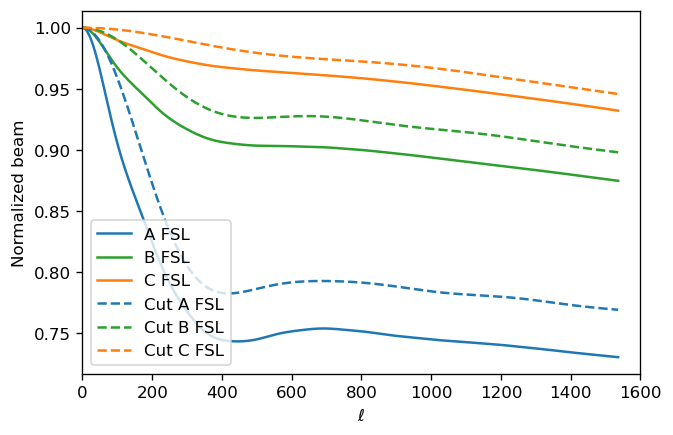

In [57]:

plt.figure(dpi=120)
plt.plot(np.arange(3*Nside+1),bl20FSL_DW)
plt.plot(np.arange(3*Nside+1),bl15FSL_DW,c='C2')
plt.plot(np.arange(3*Nside+1),bl10FSL_DW)
plt.plot(np.arange(3*Nside+1),cutbl20FSL_DW,c='C0',linestyle='dashed')
plt.plot(np.arange(3*Nside+1),cutbl15FSL_DW,c='C2',linestyle='dashed')
plt.plot(np.arange(3*Nside+1),cutbl10FSL_DW,c='C1',linestyle='dashed')
#plt.title('Normalized beam profile in multipoles S4 DW')
plt.xlabel(r'$\ell$')
plt.ylabel('Normalized beam')
plt.legend(['A FSL','B FSL','C FSL','Cut A FSL','Cut B FSL','Cut C FSL'])
plt.xlim([0,1600])

In [58]:
#Smoothing the d1 s1 fore ground IQU, 220GHz DW
map_220GHz_sm20FSL_DW=hp.sphtfunc.smoothing(map_220GHz,beam_window=bl20FSL_DW)
map_220GHz_sm10FSL_DW=hp.sphtfunc.smoothing(map_220GHz,beam_window=bl10FSL_DW)
map_220GHz_smcut20FSL_DW=hp.sphtfunc.smoothing(map_220GHz,beam_window=cutbl20FSL_DW)
map_220GHz_smcut10FSL_DW=hp.sphtfunc.smoothing(map_220GHz,beam_window=cutbl10FSL_DW)
map_220GHz_sm15FSL_DW=hp.sphtfunc.smoothing(map_220GHz,beam_window=bl15FSL_DW)
map_220GHz_smcut15FSL_DW=hp.sphtfunc.smoothing(map_220GHz,beam_window=cutbl15FSL_DW)

#Smoothing the d1 s1 fore ground IQU, 225GHz LAT
map_225GHz_sm20FSL_DW=hp.sphtfunc.smoothing(map_225GHz,beam_window=bl20FSL_DW)
map_225GHz_sm10FSL_DW=hp.sphtfunc.smoothing(map_225GHz,beam_window=bl10FSL_DW)
map_225GHz_smcut20FSL_DW=hp.sphtfunc.smoothing(map_225GHz,beam_window=cutbl20FSL_DW)
map_225GHz_smcut10FSL_DW=hp.sphtfunc.smoothing(map_225GHz,beam_window=cutbl10FSL_DW)
map_225GHz_sm15FSL_DW=hp.sphtfunc.smoothing(map_225GHz,beam_window=bl15FSL_DW)
map_225GHz_smcut15FSL_DW=hp.sphtfunc.smoothing(map_225GHz,beam_window=cutbl15FSL_DW)

#Smoothing the d1 s1 fore ground IQU, 145GHz DW LAT
map_145GHz_sm20FSL_DW=hp.sphtfunc.smoothing(map_145GHz,beam_window=bl20FSL_DW)
map_145GHz_sm10FSL_DW=hp.sphtfunc.smoothing(map_145GHz,beam_window=bl10FSL_DW)
map_145GHz_smcut20FSL_DW=hp.sphtfunc.smoothing(map_145GHz,beam_window=cutbl20FSL_DW)
map_145GHz_smcut10FSL_DW=hp.sphtfunc.smoothing(map_145GHz,beam_window=cutbl10FSL_DW)
map_145GHz_sm15FSL_DW=hp.sphtfunc.smoothing(map_145GHz,beam_window=bl15FSL_DW)
map_145GHz_smcut15FSL_DW=hp.sphtfunc.smoothing(map_145GHz,beam_window=cutbl15FSL_DW)

#Smoothing the d1 s1 fore ground IQU, 95GHz DW
map_95GHz_sm20FSL_DW=hp.sphtfunc.smoothing(map_95GHz,beam_window=bl20FSL_DW)
map_95GHz_sm10FSL_DW=hp.sphtfunc.smoothing(map_95GHz,beam_window=bl10FSL_DW)
map_95GHz_smcut20FSL_DW=hp.sphtfunc.smoothing(map_95GHz,beam_window=cutbl20FSL_DW)
map_95GHz_smcut10FSL_DW=hp.sphtfunc.smoothing(map_95GHz,beam_window=cutbl10FSL_DW)
map_95GHz_sm15FSL_DW=hp.sphtfunc.smoothing(map_95GHz,beam_window=bl15FSL_DW)
map_95GHz_smcut15FSL_DW=hp.sphtfunc.smoothing(map_95GHz,beam_window=cutbl15FSL_DW)

#Smoothing the d1 s1 fore ground IQU, 93GHz LAT
map_93GHz_sm20FSL_DW=hp.sphtfunc.smoothing(map_93GHz,beam_window=bl20FSL_DW)
map_93GHz_sm10FSL_DW=hp.sphtfunc.smoothing(map_93GHz,beam_window=bl10FSL_DW)
map_93GHz_smcut20FSL_DW=hp.sphtfunc.smoothing(map_93GHz,beam_window=cutbl20FSL_DW)
map_93GHz_smcut10FSL_DW=hp.sphtfunc.smoothing(map_93GHz,beam_window=cutbl10FSL_DW)
map_93GHz_sm15FSL_DW=hp.sphtfunc.smoothing(map_93GHz,beam_window=bl15FSL_DW)
map_93GHz_smcut15FSL_DW=hp.sphtfunc.smoothing(map_93GHz,beam_window=cutbl15FSL_DW)




#noises, caused buty inaccurate beam cut, namely the difference
noises_map_220GHz_20FSL_DW=map_220GHz_sm20FSL_DW-map_220GHz_smcut20FSL_DW
noises_map_220GHz_10FSL_DW=map_220GHz_sm10FSL_DW-map_220GHz_smcut10FSL_DW
noises_map_220GHz_15FSL_DW=map_220GHz_sm15FSL_DW-map_220GHz_smcut15FSL_DW

noises_map_225GHz_20FSL_DW=map_225GHz_sm20FSL_DW-map_225GHz_smcut20FSL_DW
noises_map_225GHz_10FSL_DW=map_225GHz_sm10FSL_DW-map_225GHz_smcut10FSL_DW
noises_map_225GHz_15FSL_DW=map_225GHz_sm15FSL_DW-map_225GHz_smcut15FSL_DW

noises_map_145GHz_20FSL_DW=map_145GHz_sm20FSL_DW-map_145GHz_smcut20FSL_DW
noises_map_145GHz_10FSL_DW=map_145GHz_sm10FSL_DW-map_145GHz_smcut10FSL_DW
noises_map_145GHz_15FSL_DW=map_145GHz_sm15FSL_DW-map_145GHz_smcut15FSL_DW

noises_map_95GHz_20FSL_DW=map_95GHz_sm20FSL_DW-map_95GHz_smcut20FSL_DW
noises_map_95GHz_10FSL_DW=map_95GHz_sm10FSL_DW-map_95GHz_smcut10FSL_DW
noises_map_95GHz_15FSL_DW=map_95GHz_sm15FSL_DW-map_95GHz_smcut15FSL_DW

noises_map_93GHz_20FSL_DW=map_93GHz_sm20FSL_DW-map_93GHz_smcut20FSL_DW
noises_map_93GHz_10FSL_DW=map_93GHz_sm10FSL_DW-map_93GHz_smcut10FSL_DW
noises_map_93GHz_15FSL_DW=map_93GHz_sm15FSL_DW-map_93GHz_smcut15FSL_DW


#CONVOLUTION
noises_map_220GHz_20FSL_mmasked_DW=noises_map_220GHz_20FSL_DW*m_apomask
noises_map_220GHz_10FSL_mmasked_DW=noises_map_220GHz_10FSL_DW*m_apomask
noises_map_220GHz_15FSL_mmasked_DW=noises_map_220GHz_15FSL_DW*m_apomask

noises_map_225GHz_20FSL_mmasked_DW=noises_map_225GHz_20FSL_DW*m_apomask
noises_map_225GHz_10FSL_mmasked_DW=noises_map_225GHz_10FSL_DW*m_apomask
noises_map_225GHz_15FSL_mmasked_DW=noises_map_225GHz_15FSL_DW*m_apomask

noises_map_145GHz_20FSL_mmasked_DW=noises_map_145GHz_20FSL_DW*m_apomask
noises_map_145GHz_10FSL_mmasked_DW=noises_map_145GHz_10FSL_DW*m_apomask
noises_map_145GHz_15FSL_mmasked_DW=noises_map_145GHz_15FSL_DW*m_apomask

noises_map_95GHz_20FSL_mmasked_DW=noises_map_95GHz_20FSL_DW*m_apomask
noises_map_95GHz_10FSL_mmasked_DW=noises_map_95GHz_10FSL_DW*m_apomask
noises_map_95GHz_15FSL_mmasked_DW=noises_map_95GHz_15FSL_DW*m_apomask

noises_map_93GHz_20FSL_mmasked_DW=noises_map_93GHz_20FSL_DW*m_apomask
noises_map_93GHz_10FSL_mmasked_DW=noises_map_93GHz_10FSL_DW*m_apomask
noises_map_93GHz_15FSL_mmasked_DW=noises_map_93GHz_15FSL_DW*m_apomask

In [59]:
#to TEB
noises_map_225GHz_20FSL_mmasked_TEB_DW=hp.anafast(noises_map_225GHz_20FSL_mmasked_DW,pol=True)  
noises_map_225GHz_10FSL_mmasked_TEB_DW=hp.anafast(noises_map_225GHz_10FSL_mmasked_DW,pol=True)  
noises_map_225GHz_15FSL_mmasked_TEB_DW=hp.anafast(noises_map_225GHz_15FSL_mmasked_DW,pol=True)  

noises_map_220GHz_20FSL_mmasked_TEB_DW=hp.anafast(noises_map_220GHz_20FSL_mmasked_DW,pol=True)  
noises_map_220GHz_10FSL_mmasked_TEB_DW=hp.anafast(noises_map_220GHz_10FSL_mmasked_DW,pol=True)  
noises_map_220GHz_15FSL_mmasked_TEB_DW=hp.anafast(noises_map_220GHz_15FSL_mmasked_DW,pol=True)  

noises_map_145GHz_20FSL_mmasked_TEB_DW=hp.anafast(noises_map_145GHz_20FSL_mmasked_DW,pol=True)  
noises_map_145GHz_10FSL_mmasked_TEB_DW=hp.anafast(noises_map_145GHz_10FSL_mmasked_DW,pol=True)
noises_map_145GHz_15FSL_mmasked_TEB_DW=hp.anafast(noises_map_145GHz_15FSL_mmasked_DW,pol=True)

noises_map_95GHz_20FSL_mmasked_TEB_DW=hp.anafast(noises_map_95GHz_20FSL_mmasked_DW,pol=True)  
noises_map_95GHz_10FSL_mmasked_TEB_DW=hp.anafast(noises_map_95GHz_10FSL_mmasked_DW,pol=True)
noises_map_95GHz_15FSL_mmasked_TEB_DW=hp.anafast(noises_map_95GHz_15FSL_mmasked_DW,pol=True)

noises_map_93GHz_20FSL_mmasked_TEB_DW=hp.anafast(noises_map_93GHz_20FSL_mmasked_DW,pol=True)  
noises_map_93GHz_10FSL_mmasked_TEB_DW=hp.anafast(noises_map_93GHz_10FSL_mmasked_DW,pol=True)
noises_map_93GHz_15FSL_mmasked_TEB_DW=hp.anafast(noises_map_93GHz_15FSL_mmasked_DW,pol=True)

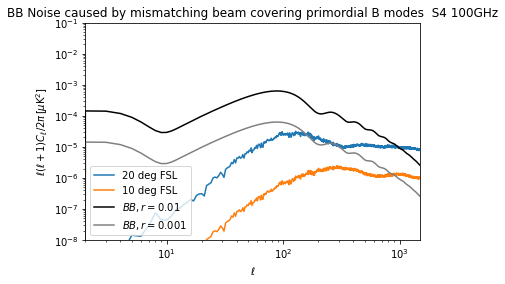

In [60]:
#ideal antenna with FWHM, for B-mode convolution for the comparison
res_S4=1.4 #In arcmin, typically for S4
FWHM_S4=0.000290888209*res_S4
sigma_S4=FWHM_S4/(2*np.sqrt(2*np.log(2)))

def ant(ls):
    return np.exp(-ls*(ls+1)*sigma_S4*sigma_S4)


ls = np.arange(3*Nside)
plt.plot(ls,ls*(ls+1)*noises_map_93GHz_20FSL_mmasked_TEB_DW[2]/2/np.pi,c='C0')
plt.plot(ls,ls*(ls+1)*noises_map_93GHz_10FSL_mmasked_TEB_DW[2]/2/np.pi,c='C1')
plt.plot(np.arange(1501),cl56[:,2]*ant(np.arange(1501)),'black')
plt.plot(np.arange(1501),cl01[:,2]*ant(np.arange(1501)),'grey')
plt.title('BB Noise caused by mismatching beam covering primordial B modes  S4 100GHz')
plt.xlim([2,1500])
plt.ylim([0.00000001,0.1])
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi\,[\mu {\rm K}^2]$')
plt.legend(['20 deg FSL','10 deg FSL','$BB, r = 0.01$','$BB, r = 0.001$'], loc='lower left');
plt.xlabel(r'$\ell$');
plt.show()

#  narrower center beam causes bigget noise

In [61]:
%store noises_map_225GHz_10FSL_mmasked_TEB_DW
%store noises_map_225GHz_20FSL_mmasked_TEB_DW
%store noises_map_225GHz_15FSL_mmasked_TEB_DW
%store noises_map_220GHz_10FSL_mmasked_TEB_DW
%store noises_map_220GHz_20FSL_mmasked_TEB_DW
%store noises_map_220GHz_15FSL_mmasked_TEB_DW
%store noises_map_145GHz_10FSL_mmasked_TEB_DW
%store noises_map_145GHz_20FSL_mmasked_TEB_DW
%store noises_map_145GHz_15FSL_mmasked_TEB_DW
%store noises_map_95GHz_10FSL_mmasked_TEB_DW
%store noises_map_95GHz_20FSL_mmasked_TEB_DW
%store noises_map_95GHz_15FSL_mmasked_TEB_DW
%store noises_map_93GHz_10FSL_mmasked_TEB_DW
%store noises_map_93GHz_20FSL_mmasked_TEB_DW
%store noises_map_93GHz_15FSL_mmasked_TEB_DW

Stored 'noises_map_225GHz_10FSL_mmasked_TEB_DW' (ndarray)
Stored 'noises_map_225GHz_20FSL_mmasked_TEB_DW' (ndarray)
Stored 'noises_map_225GHz_15FSL_mmasked_TEB_DW' (ndarray)
Stored 'noises_map_220GHz_10FSL_mmasked_TEB_DW' (ndarray)
Stored 'noises_map_220GHz_20FSL_mmasked_TEB_DW' (ndarray)
Stored 'noises_map_220GHz_15FSL_mmasked_TEB_DW' (ndarray)
Stored 'noises_map_145GHz_10FSL_mmasked_TEB_DW' (ndarray)
Stored 'noises_map_145GHz_20FSL_mmasked_TEB_DW' (ndarray)
Stored 'noises_map_145GHz_15FSL_mmasked_TEB_DW' (ndarray)
Stored 'noises_map_95GHz_10FSL_mmasked_TEB_DW' (ndarray)
Stored 'noises_map_95GHz_20FSL_mmasked_TEB_DW' (ndarray)
Stored 'noises_map_95GHz_15FSL_mmasked_TEB_DW' (ndarray)
Stored 'noises_map_93GHz_10FSL_mmasked_TEB_DW' (ndarray)
Stored 'noises_map_93GHz_20FSL_mmasked_TEB_DW' (ndarray)
Stored 'noises_map_93GHz_15FSL_mmasked_TEB_DW' (ndarray)


## SO SAT

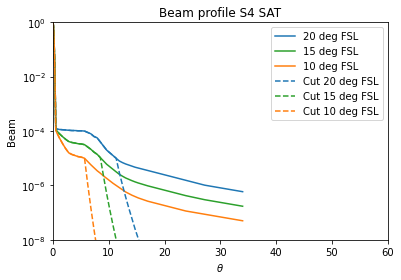

In [62]:
# Beam window non gaussian       S4


FWHM_SAT=17/60     
sigma_SAT=FWHM_SAT/2/np.sqrt(2*np.log(2))

smalltheta_SAT=np.arange(0,0.50991,0.00001)    #-39dB
theta_SAT=np.append(smalltheta_SAT,bigtheta*17/30)
theta_rad_SAT=np.pi/180*theta_SAT


central_gauss_beam_SAT=np.exp(-1/2*smalltheta_SAT**2/sigma_SAT**2)   # 14 arcmin FHWM


beam20FSL_SAT=np.append(central_gauss_beam_SAT,sidelobe20FSL)
beam15FSL_SAT=np.append(central_gauss_beam_SAT,sidelobe15FSL)
beam10FSL_SAT=np.append(central_gauss_beam_SAT,sidelobe10FSL)
cutbeam20FSL_SAT=np.append(central_gauss_beam_SAT,cut_sidelobe20FSL)
cutbeam15FSL_SAT=np.append(central_gauss_beam_SAT,cut_sidelobe15FSL)
cutbeam10FSL_SAT=np.append(central_gauss_beam_SAT,cut_sidelobe10FSL)


plt.plot(theta_SAT,beam20FSL_SAT, c='C0')
plt.plot(theta_SAT,beam15FSL_SAT, c='C2')
plt.plot(theta_SAT,beam10FSL_SAT, c='C1')
plt.plot(theta_SAT,cutbeam20FSL_SAT,c='C0',linestyle='dashed')
plt.plot(theta_SAT,cutbeam15FSL_SAT,c='C2',linestyle='dashed')
plt.plot(theta_SAT,cutbeam10FSL_SAT,c='C1',linestyle='dashed')
plt.title('Beam profile S4 SAT')
plt.xlabel(r'$\theta$')
plt.ylabel('Beam')
plt.xlim([0,60])
plt.ylim([0.00000001,1])
plt.legend(['20 deg FSL','15 deg FSL','10 deg FSL','Cut 20 deg FSL','Cut 15 deg FSL','Cut 10 deg FSL'])

plt.yscale('log')

plt.show()

In [63]:
#beam to spherical harmonic

bl20FSL_SAT=hp.sphtfunc.beam2bl(beam20FSL_SAT, theta_rad_SAT, lmax=3*Nside)#HERE lmax is important, choose the same as the map's lmax
bl20FSL_SAT=bl20FSL_SAT/bl20FSL_SAT[0]                                    

bl15FSL_SAT=hp.sphtfunc.beam2bl(beam15FSL_SAT, theta_rad_SAT, lmax=3*Nside)
bl15FSL_SAT=bl15FSL_SAT/bl15FSL_SAT[0]

bl10FSL_SAT=hp.sphtfunc.beam2bl(beam10FSL_SAT, theta_rad_SAT, lmax=3*Nside)
bl10FSL_SAT=bl10FSL_SAT/bl10FSL_SAT[0]                                   



cutbl20FSL_SAT=hp.sphtfunc.beam2bl(cutbeam20FSL_SAT, theta_rad_SAT, lmax=3*Nside)
cutbl20FSL_SAT=cutbl20FSL_SAT/cutbl20FSL_SAT[0]           

cutbl15FSL_SAT=hp.sphtfunc.beam2bl(cutbeam15FSL_SAT, theta_rad_SAT, lmax=3*Nside)
cutbl15FSL_SAT=cutbl15FSL_SAT/cutbl15FSL_SAT[0]    


cutbl10FSL_SAT=hp.sphtfunc.beam2bl(cutbeam10FSL_SAT, theta_rad_SAT, lmax=3*Nside)
cutbl10FSL_SAT=cutbl10FSL_SAT/cutbl10FSL_SAT[0]    


(0.0, 1000.0)

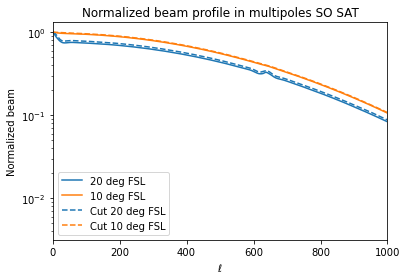

In [64]:

plt.plot(np.arange(3*Nside+1),bl20FSL_SAT)
plt.plot(np.arange(3*Nside+1),bl10FSL_SAT)
plt.plot(np.arange(3*Nside+1),cutbl20FSL_SAT,c='C0',linestyle='dashed')
plt.plot(np.arange(3*Nside+1),cutbl10FSL_SAT,c='C1',linestyle='dashed')
plt.title('Normalized beam profile in multipoles SO SAT')
plt.xlabel(r'$\ell$')
plt.ylabel('Normalized beam')
plt.legend(['20 deg FSL','10 deg FSL','Cut 20 deg FSL','Cut 10 deg FSL'])
plt.yscale('log')
plt.xlim([0,1000])

In [65]:
#Smoothing the d1 s1 fore ground IQU, 225GHz SAT
map_225GHz_sm20FSL_SAT=hp.sphtfunc.smoothing(map_225GHz,beam_window=bl20FSL_SAT)
map_225GHz_sm10FSL_SAT=hp.sphtfunc.smoothing(map_225GHz,beam_window=bl10FSL_SAT)
map_225GHz_smcut20FSL_SAT=hp.sphtfunc.smoothing(map_225GHz,beam_window=cutbl20FSL_SAT)
map_225GHz_smcut10FSL_SAT=hp.sphtfunc.smoothing(map_225GHz,beam_window=cutbl10FSL_SAT)
map_225GHz_sm15FSL_SAT=hp.sphtfunc.smoothing(map_225GHz,beam_window=bl15FSL_SAT)
map_225GHz_smcut15FSL_SAT=hp.sphtfunc.smoothing(map_225GHz,beam_window=cutbl15FSL_SAT)

#Smoothing the d1 s1 fore ground IQU, 145GHz SAT
map_145GHz_sm20FSL_SAT=hp.sphtfunc.smoothing(map_145GHz,beam_window=bl20FSL_SAT)
map_145GHz_sm10FSL_SAT=hp.sphtfunc.smoothing(map_145GHz,beam_window=bl10FSL_SAT)
map_145GHz_smcut20FSL_SAT=hp.sphtfunc.smoothing(map_145GHz,beam_window=cutbl20FSL_SAT)
map_145GHz_smcut10FSL_SAT=hp.sphtfunc.smoothing(map_145GHz,beam_window=cutbl10FSL_SAT)
map_145GHz_sm15FSL_SAT=hp.sphtfunc.smoothing(map_145GHz,beam_window=bl15FSL_SAT)
map_145GHz_smcut15FSL_SAT=hp.sphtfunc.smoothing(map_145GHz,beam_window=cutbl15FSL_SAT)


#Smoothing the d1 s1 fore ground IQU, 93GHz SAT
map_93GHz_sm20FSL_SAT=hp.sphtfunc.smoothing(map_93GHz,beam_window=bl20FSL_SAT)
map_93GHz_sm10FSL_SAT=hp.sphtfunc.smoothing(map_93GHz,beam_window=bl10FSL_SAT)
map_93GHz_smcut20FSL_SAT=hp.sphtfunc.smoothing(map_93GHz,beam_window=cutbl20FSL_SAT)
map_93GHz_smcut10FSL_SAT=hp.sphtfunc.smoothing(map_93GHz,beam_window=cutbl10FSL_SAT)
map_93GHz_sm15FSL_SAT=hp.sphtfunc.smoothing(map_93GHz,beam_window=bl15FSL_SAT)
map_93GHz_smcut15FSL_SAT=hp.sphtfunc.smoothing(map_93GHz,beam_window=cutbl15FSL_SAT)




#noises, caused buty inaccurate beam cut, namely the difference
noises_map_225GHz_20FSL_SAT=map_225GHz_sm20FSL_SAT-map_225GHz_smcut20FSL_SAT
noises_map_225GHz_10FSL_SAT=map_225GHz_sm10FSL_SAT-map_225GHz_smcut10FSL_SAT
noises_map_225GHz_15FSL_SAT=map_225GHz_sm15FSL_SAT-map_225GHz_smcut15FSL_SAT

noises_map_145GHz_20FSL_SAT=map_145GHz_sm20FSL_SAT-map_145GHz_smcut20FSL_SAT
noises_map_145GHz_10FSL_SAT=map_145GHz_sm10FSL_SAT-map_145GHz_smcut10FSL_SAT
noises_map_145GHz_15FSL_SAT=map_145GHz_sm15FSL_SAT-map_145GHz_smcut15FSL_SAT

noises_map_93GHz_20FSL_SAT=map_93GHz_sm20FSL_SAT-map_93GHz_smcut20FSL_SAT
noises_map_93GHz_10FSL_SAT=map_93GHz_sm10FSL_SAT-map_93GHz_smcut10FSL_SAT
noises_map_93GHz_15FSL_SAT=map_93GHz_sm15FSL_SAT-map_93GHz_smcut15FSL_SAT





noises_map_225GHz_20FSL_mmasked_SAT=noises_map_225GHz_20FSL_SAT*m_apomask
noises_map_225GHz_10FSL_mmasked_SAT=noises_map_225GHz_10FSL_SAT*m_apomask
noises_map_225GHz_15FSL_mmasked_SAT=noises_map_225GHz_15FSL_SAT*m_apomask

noises_map_145GHz_20FSL_mmasked_SAT=noises_map_145GHz_20FSL_SAT*m_apomask
noises_map_145GHz_10FSL_mmasked_SAT=noises_map_145GHz_10FSL_SAT*m_apomask
noises_map_145GHz_15FSL_mmasked_SAT=noises_map_145GHz_15FSL_SAT*m_apomask

noises_map_93GHz_20FSL_mmasked_SAT=noises_map_93GHz_20FSL_SAT*m_apomask
noises_map_93GHz_10FSL_mmasked_SAT=noises_map_93GHz_10FSL_SAT*m_apomask
noises_map_93GHz_15FSL_mmasked_SAT=noises_map_93GHz_15FSL_SAT*m_apomask

In [66]:
#to TEB
noises_map_225GHz_20FSL_mmasked_TEB_SAT=hp.anafast(noises_map_225GHz_20FSL_mmasked_SAT,pol=True)  
noises_map_225GHz_10FSL_mmasked_TEB_SAT=hp.anafast(noises_map_225GHz_10FSL_mmasked_SAT,pol=True)  
noises_map_225GHz_15FSL_mmasked_TEB_SAT=hp.anafast(noises_map_225GHz_15FSL_mmasked_SAT,pol=True)  

noises_map_145GHz_20FSL_mmasked_TEB_SAT=hp.anafast(noises_map_145GHz_20FSL_mmasked_SAT,pol=True)  
noises_map_145GHz_10FSL_mmasked_TEB_SAT=hp.anafast(noises_map_145GHz_10FSL_mmasked_SAT,pol=True)
noises_map_145GHz_15FSL_mmasked_TEB_SAT=hp.anafast(noises_map_145GHz_15FSL_mmasked_SAT,pol=True)

noises_map_93GHz_20FSL_mmasked_TEB_SAT=hp.anafast(noises_map_93GHz_20FSL_mmasked_SAT,pol=True)  
noises_map_93GHz_10FSL_mmasked_TEB_SAT=hp.anafast(noises_map_93GHz_10FSL_mmasked_SAT,pol=True)
noises_map_93GHz_15FSL_mmasked_TEB_SAT=hp.anafast(noises_map_93GHz_15FSL_mmasked_SAT,pol=True)

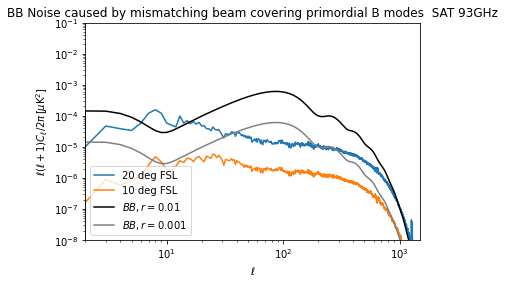

In [67]:
#ideal antenna with FWHM, for B-mode convolution for the comparison
res_SAT=17 #In arcmin, typically for S4
FWHM_SATT=0.000290888209*res_SAT
sigma_SATT=FWHM_SATT/(2*np.sqrt(2*np.log(2)))

def ant(ls):
    return np.exp(-ls*(ls+1)*sigma_SATT*sigma_SATT)


ls = np.arange(3*Nside)
plt.plot(ls,ls*(ls+1)*noises_map_93GHz_20FSL_mmasked_TEB_SAT[2]/2/np.pi,c='C0')
plt.plot(ls,ls*(ls+1)*noises_map_93GHz_10FSL_mmasked_TEB_SAT[2]/2/np.pi,c='C1')
plt.plot(np.arange(1501),cl56[:,2]*ant(np.arange(1501)),'black')
plt.plot(np.arange(1501),cl01[:,2]*ant(np.arange(1501)),'grey')
plt.title('BB Noise caused by mismatching beam covering primordial B modes  SAT 93GHz')
plt.xlim([2,1500])
plt.ylim([0.00000001,0.1])
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi\,[\mu {\rm K}^2]$')
plt.legend(['20 deg FSL','10 deg FSL','$BB, r = 0.01$','$BB, r = 0.001$'], loc='lower left');
plt.xlabel(r'$\ell$');
plt.show()

#  narrower center beam causes bigget noise

In [68]:
%store noises_map_225GHz_10FSL_mmasked_TEB_SAT
%store noises_map_225GHz_20FSL_mmasked_TEB_SAT
%store noises_map_225GHz_15FSL_mmasked_TEB_SAT
%store noises_map_145GHz_10FSL_mmasked_TEB_SAT
%store noises_map_145GHz_20FSL_mmasked_TEB_SAT
%store noises_map_145GHz_15FSL_mmasked_TEB_SAT
%store noises_map_93GHz_10FSL_mmasked_TEB_SAT
%store noises_map_93GHz_20FSL_mmasked_TEB_SAT
%store noises_map_93GHz_15FSL_mmasked_TEB_SAT

Stored 'noises_map_225GHz_10FSL_mmasked_TEB_SAT' (ndarray)
Stored 'noises_map_225GHz_20FSL_mmasked_TEB_SAT' (ndarray)
Stored 'noises_map_225GHz_15FSL_mmasked_TEB_SAT' (ndarray)
Stored 'noises_map_145GHz_10FSL_mmasked_TEB_SAT' (ndarray)
Stored 'noises_map_145GHz_20FSL_mmasked_TEB_SAT' (ndarray)
Stored 'noises_map_145GHz_15FSL_mmasked_TEB_SAT' (ndarray)
Stored 'noises_map_93GHz_10FSL_mmasked_TEB_SAT' (ndarray)
Stored 'noises_map_93GHz_20FSL_mmasked_TEB_SAT' (ndarray)
Stored 'noises_map_93GHz_15FSL_mmasked_TEB_SAT' (ndarray)


## S4 UD

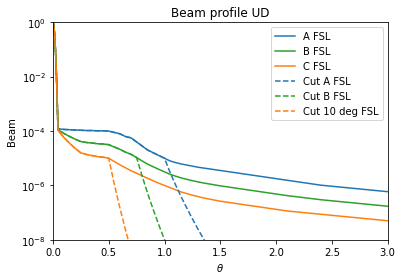

In [69]:
# Beam window non gaussian     


FWHM_UD=1.5/60     
sigma_UD=FWHM_UD/2/np.sqrt(2*np.log(2))

smalltheta_UD=np.arange(0,0.04499,0.00001)    #-39dB
theta_UD=np.append(smalltheta_UD,bigtheta*1.5/30)
theta_rad_UD=np.pi/180*theta_UD


central_gauss_beam_UD=np.exp(-1/2*smalltheta_UD**2/sigma_UD**2)   # 14 arcmin FHWM


beam20FSL_UD=np.append(central_gauss_beam_UD,sidelobe20FSL)
beam15FSL_UD=np.append(central_gauss_beam_UD,sidelobe15FSL)
beam10FSL_UD=np.append(central_gauss_beam_UD,sidelobe10FSL)
cutbeam20FSL_UD=np.append(central_gauss_beam_UD,cut_sidelobe20FSL)
cutbeam15FSL_UD=np.append(central_gauss_beam_UD,cut_sidelobe15FSL)
cutbeam10FSL_UD=np.append(central_gauss_beam_UD,cut_sidelobe10FSL)


plt.plot(theta_UD,beam20FSL_UD, c='C0')
plt.plot(theta_UD,beam15FSL_UD, c='C2')
plt.plot(theta_UD,beam10FSL_UD, c='C1')
plt.plot(theta_UD,cutbeam20FSL_UD,c='C0',linestyle='dashed')
plt.plot(theta_UD,cutbeam15FSL_UD,c='C2',linestyle='dashed')
plt.plot(theta_UD,cutbeam10FSL_UD,c='C1',linestyle='dashed')
plt.title('Beam profile UD')
plt.xlabel(r'$\theta$')
plt.ylabel('Beam')
plt.xlim([0,3])
plt.ylim([0.00000001,1])
plt.legend(['A FSL','B FSL','C FSL','Cut A FSL','Cut B FSL','Cut 10 deg FSL'])

plt.yscale('log')

plt.show()

In [70]:
#beam to spherical harmonic

bl20FSL_UD=hp.sphtfunc.beam2bl(beam20FSL_UD, theta_rad_UD, lmax=3*Nside)#HERE lmax is important, choose the same as the map's lmax
bl20FSL_UD=bl20FSL_UD/bl20FSL_UD[0]                                    

bl15FSL_UD=hp.sphtfunc.beam2bl(beam15FSL_UD, theta_rad_UD, lmax=3*Nside)
bl15FSL_UD=bl15FSL_UD/bl15FSL_UD[0]

bl10FSL_UD=hp.sphtfunc.beam2bl(beam10FSL_UD, theta_rad_UD, lmax=3*Nside)
bl10FSL_UD=bl10FSL_UD/bl10FSL_UD[0]                                   



cutbl20FSL_UD=hp.sphtfunc.beam2bl(cutbeam20FSL_UD, theta_rad_UD, lmax=3*Nside)
cutbl20FSL_UD=cutbl20FSL_UD/cutbl20FSL_UD[0]           

cutbl15FSL_UD=hp.sphtfunc.beam2bl(cutbeam15FSL_UD, theta_rad_UD, lmax=3*Nside)
cutbl15FSL_UD=cutbl15FSL_UD/cutbl15FSL_UD[0]    


cutbl10FSL_UD=hp.sphtfunc.beam2bl(cutbeam10FSL_UD, theta_rad_UD, lmax=3*Nside)
cutbl10FSL_UD=cutbl10FSL_UD/cutbl10FSL_UD[0]    


(0.0, 1000.0)

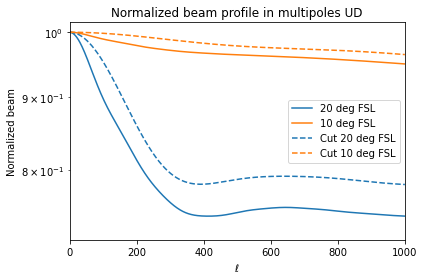

In [71]:

plt.plot(np.arange(3*Nside+1),bl20FSL_UD)
plt.plot(np.arange(3*Nside+1),bl10FSL_UD)
plt.plot(np.arange(3*Nside+1),cutbl20FSL_UD,c='C0',linestyle='dashed')
plt.plot(np.arange(3*Nside+1),cutbl10FSL_UD,c='C1',linestyle='dashed')
plt.title('Normalized beam profile in multipoles UD')
plt.xlabel(r'$\ell$')
plt.ylabel('Normalized beam')
plt.legend(['20 deg FSL','10 deg FSL','Cut 20 deg FSL','Cut 10 deg FSL'])
plt.yscale('log')
plt.xlim([0,1000])

In [72]:
#Smoothing the d1 s1 fore ground IQU, 220GHz UD
map_220GHz_sm20FSL_UD=hp.sphtfunc.smoothing(map_220GHz,beam_window=bl20FSL_UD)
map_220GHz_sm10FSL_UD=hp.sphtfunc.smoothing(map_220GHz,beam_window=bl10FSL_UD)
map_220GHz_smcut20FSL_UD=hp.sphtfunc.smoothing(map_220GHz,beam_window=cutbl20FSL_UD)
map_220GHz_smcut10FSL_UD=hp.sphtfunc.smoothing(map_220GHz,beam_window=cutbl10FSL_UD)
map_220GHz_sm15FSL_UD=hp.sphtfunc.smoothing(map_220GHz,beam_window=bl15FSL_UD)
map_220GHz_smcut15FSL_UD=hp.sphtfunc.smoothing(map_220GHz,beam_window=cutbl15FSL_UD)

#Smoothing the d1 s1 fore ground IQU, 145GHz UD
map_145GHz_sm20FSL_UD=hp.sphtfunc.smoothing(map_145GHz,beam_window=bl20FSL_UD)
map_145GHz_sm10FSL_UD=hp.sphtfunc.smoothing(map_145GHz,beam_window=bl10FSL_UD)
map_145GHz_smcut20FSL_UD=hp.sphtfunc.smoothing(map_145GHz,beam_window=cutbl20FSL_UD)
map_145GHz_smcut10FSL_UD=hp.sphtfunc.smoothing(map_145GHz,beam_window=cutbl10FSL_UD)
map_145GHz_sm15FSL_UD=hp.sphtfunc.smoothing(map_145GHz,beam_window=bl15FSL_UD)
map_145GHz_smcut15FSL_UD=hp.sphtfunc.smoothing(map_145GHz,beam_window=cutbl15FSL_UD)


#Smoothing the d1 s1 fore ground IQU, 95GHz UD
map_95GHz_sm20FSL_UD=hp.sphtfunc.smoothing(map_95GHz,beam_window=bl20FSL_UD)
map_95GHz_sm10FSL_UD=hp.sphtfunc.smoothing(map_95GHz,beam_window=bl10FSL_UD)
map_95GHz_smcut20FSL_UD=hp.sphtfunc.smoothing(map_95GHz,beam_window=cutbl20FSL_UD)
map_95GHz_smcut10FSL_UD=hp.sphtfunc.smoothing(map_95GHz,beam_window=cutbl10FSL_UD)
map_95GHz_sm15FSL_UD=hp.sphtfunc.smoothing(map_95GHz,beam_window=bl15FSL_UD)
map_95GHz_smcut15FSL_UD=hp.sphtfunc.smoothing(map_95GHz,beam_window=cutbl15FSL_UD)




#noises, caused buty inaccurate beam cut, namely the difference
noises_map_220GHz_20FSL_UD=map_220GHz_sm20FSL_UD-map_220GHz_smcut20FSL_UD
noises_map_220GHz_10FSL_UD=map_220GHz_sm10FSL_UD-map_220GHz_smcut10FSL_UD
noises_map_220GHz_15FSL_UD=map_220GHz_sm15FSL_UD-map_220GHz_smcut15FSL_UD

noises_map_145GHz_20FSL_UD=map_145GHz_sm20FSL_UD-map_145GHz_smcut20FSL_UD
noises_map_145GHz_10FSL_UD=map_145GHz_sm10FSL_UD-map_145GHz_smcut10FSL_UD
noises_map_145GHz_15FSL_UD=map_145GHz_sm15FSL_UD-map_145GHz_smcut15FSL_UD

noises_map_95GHz_20FSL_UD=map_95GHz_sm20FSL_UD-map_95GHz_smcut20FSL_UD
noises_map_95GHz_10FSL_UD=map_95GHz_sm10FSL_UD-map_95GHz_smcut10FSL_UD
noises_map_95GHz_15FSL_UD=map_95GHz_sm15FSL_UD-map_95GHz_smcut15FSL_UD





noises_map_220GHz_20FSL_mmasked_UD=noises_map_220GHz_20FSL_UD*m_apomask
noises_map_220GHz_10FSL_mmasked_UD=noises_map_220GHz_10FSL_UD*m_apomask
noises_map_220GHz_15FSL_mmasked_UD=noises_map_220GHz_15FSL_UD*m_apomask

noises_map_145GHz_20FSL_mmasked_UD=noises_map_145GHz_20FSL_UD*m_apomask
noises_map_145GHz_10FSL_mmasked_UD=noises_map_145GHz_10FSL_UD*m_apomask
noises_map_145GHz_15FSL_mmasked_UD=noises_map_145GHz_15FSL_UD*m_apomask

noises_map_95GHz_20FSL_mmasked_UD=noises_map_95GHz_20FSL_UD*m_apomask
noises_map_95GHz_10FSL_mmasked_UD=noises_map_95GHz_10FSL_UD*m_apomask
noises_map_95GHz_15FSL_mmasked_UD=noises_map_95GHz_15FSL_UD*m_apomask

In [73]:
#to TEB
noises_map_220GHz_20FSL_mmasked_TEB_UD=hp.anafast(noises_map_220GHz_20FSL_mmasked_UD,pol=True)  
noises_map_220GHz_10FSL_mmasked_TEB_UD=hp.anafast(noises_map_220GHz_10FSL_mmasked_UD,pol=True)  
noises_map_220GHz_15FSL_mmasked_TEB_UD=hp.anafast(noises_map_220GHz_15FSL_mmasked_UD,pol=True)  

noises_map_145GHz_20FSL_mmasked_TEB_UD=hp.anafast(noises_map_145GHz_20FSL_mmasked_UD,pol=True)  
noises_map_145GHz_10FSL_mmasked_TEB_UD=hp.anafast(noises_map_145GHz_10FSL_mmasked_UD,pol=True)
noises_map_145GHz_15FSL_mmasked_TEB_UD=hp.anafast(noises_map_145GHz_15FSL_mmasked_UD,pol=True)

noises_map_95GHz_20FSL_mmasked_TEB_UD=hp.anafast(noises_map_95GHz_20FSL_mmasked_UD,pol=True)  
noises_map_95GHz_10FSL_mmasked_TEB_UD=hp.anafast(noises_map_95GHz_10FSL_mmasked_UD,pol=True)
noises_map_95GHz_15FSL_mmasked_TEB_UD=hp.anafast(noises_map_95GHz_15FSL_mmasked_UD,pol=True)

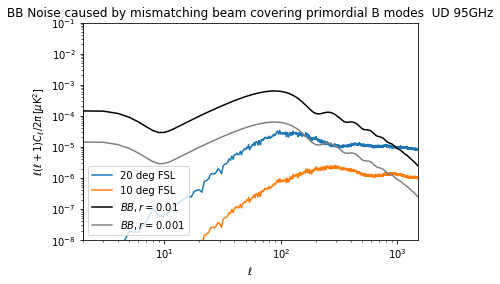

In [74]:
#ideal antenna with FWHM, for B-mode convolution for the comparison
res_UD=1.5 #In arcmin, typically for UD
FWHM_UDU=0.000290888209*res_UD
sigma_UDU=FWHM_UDU/(2*np.sqrt(2*np.log(2)))

def ant(ls):
    return np.exp(-ls*(ls+1)*sigma_UDU*sigma_UDU)


ls = np.arange(3*Nside)
plt.plot(ls,ls*(ls+1)*noises_map_95GHz_20FSL_mmasked_TEB_UD[2]/2/np.pi,c='C0')
plt.plot(ls,ls*(ls+1)*noises_map_95GHz_10FSL_mmasked_TEB_UD[2]/2/np.pi,c='C1')
plt.plot(np.arange(1501),cl56[:,2]*ant(np.arange(1501)),'black')
plt.plot(np.arange(1501),cl01[:,2]*ant(np.arange(1501)),'grey')
plt.title('BB Noise caused by mismatching beam covering primordial B modes  UD 95GHz')
plt.xlim([2,1500])
plt.ylim([0.00000001,0.1])
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi\,[\mu {\rm K}^2]$')
plt.legend(['20 deg FSL','10 deg FSL','$BB, r = 0.01$','$BB, r = 0.001$'], loc='lower left');
plt.xlabel(r'$\ell$');
plt.show()


In [75]:
%store noises_map_220GHz_10FSL_mmasked_TEB_UD
%store noises_map_220GHz_20FSL_mmasked_TEB_UD
%store noises_map_220GHz_15FSL_mmasked_TEB_UD
%store noises_map_145GHz_10FSL_mmasked_TEB_UD
%store noises_map_145GHz_20FSL_mmasked_TEB_UD
%store noises_map_145GHz_15FSL_mmasked_TEB_UD
%store noises_map_95GHz_10FSL_mmasked_TEB_UD
%store noises_map_95GHz_20FSL_mmasked_TEB_UD
%store noises_map_95GHz_15FSL_mmasked_TEB_UD

Stored 'noises_map_220GHz_10FSL_mmasked_TEB_UD' (ndarray)
Stored 'noises_map_220GHz_20FSL_mmasked_TEB_UD' (ndarray)
Stored 'noises_map_220GHz_15FSL_mmasked_TEB_UD' (ndarray)
Stored 'noises_map_145GHz_10FSL_mmasked_TEB_UD' (ndarray)
Stored 'noises_map_145GHz_20FSL_mmasked_TEB_UD' (ndarray)
Stored 'noises_map_145GHz_15FSL_mmasked_TEB_UD' (ndarray)
Stored 'noises_map_95GHz_10FSL_mmasked_TEB_UD' (ndarray)
Stored 'noises_map_95GHz_20FSL_mmasked_TEB_UD' (ndarray)
Stored 'noises_map_95GHz_15FSL_mmasked_TEB_UD' (ndarray)


## PICO

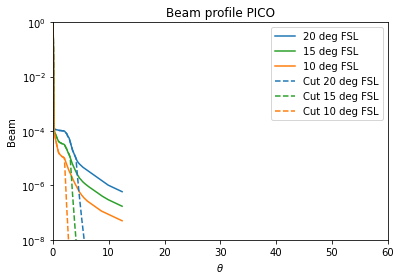

In [13]:
# Beam window non gaussian       S4


FWHM_PICO=6.2/60     
sigma_PICO=FWHM_PICO/2/np.sqrt(2*np.log(2))

smalltheta_PICO=np.arange(0,0.18597,0.00001)    #-39dB
theta_PICO=np.append(smalltheta_PICO,bigtheta*6.2/30)
theta_rad_PICO=np.pi/180*theta_PICO


central_gauss_beam_PICO=np.exp(-1/2*smalltheta_PICO**2/sigma_PICO**2)   # 14 arcmin FHWM


beam20FSL_PICO=np.append(central_gauss_beam_PICO,sidelobe20FSL)
beam15FSL_PICO=np.append(central_gauss_beam_PICO,sidelobe15FSL)
beam10FSL_PICO=np.append(central_gauss_beam_PICO,sidelobe10FSL)
cutbeam20FSL_PICO=np.append(central_gauss_beam_PICO,cut_sidelobe20FSL)
cutbeam15FSL_PICO=np.append(central_gauss_beam_PICO,cut_sidelobe15FSL)
cutbeam10FSL_PICO=np.append(central_gauss_beam_PICO,cut_sidelobe10FSL)


plt.plot(theta_PICO,beam20FSL_PICO, c='C0')
plt.plot(theta_PICO,beam15FSL_PICO, c='C2')
plt.plot(theta_PICO,beam10FSL_PICO, c='C1')
plt.plot(theta_PICO,cutbeam20FSL_PICO,c='C0',linestyle='dashed')
plt.plot(theta_PICO,cutbeam15FSL_PICO,c='C2',linestyle='dashed')
plt.plot(theta_PICO,cutbeam10FSL_PICO,c='C1',linestyle='dashed')
plt.title('Beam profile PICO')
plt.xlabel(r'$\theta$')
plt.ylabel('Beam')
plt.xlim([0,60])
plt.ylim([0.00000001,1])
plt.legend(['20 deg FSL','15 deg FSL','10 deg FSL','Cut 20 deg FSL','Cut 15 deg FSL','Cut 10 deg FSL'])

plt.yscale('log')

plt.show()

In [14]:
#beam to spherical harmonic

bl20FSL_PICO=hp.sphtfunc.beam2bl(beam20FSL_PICO, theta_rad_PICO, lmax=3*Nside)#HERE lmax is important, choose the same as the map's lmax
bl20FSL_PICO=bl20FSL_PICO/bl20FSL_PICO[0]                                    

bl15FSL_PICO=hp.sphtfunc.beam2bl(beam15FSL_PICO, theta_rad_PICO, lmax=3*Nside)
bl15FSL_PICO=bl15FSL_PICO/bl15FSL_PICO[0]

bl10FSL_PICO=hp.sphtfunc.beam2bl(beam10FSL_PICO, theta_rad_PICO, lmax=3*Nside)
bl10FSL_PICO=bl10FSL_PICO/bl10FSL_PICO[0]                                   



cutbl20FSL_PICO=hp.sphtfunc.beam2bl(cutbeam20FSL_PICO, theta_rad_PICO, lmax=3*Nside)
cutbl20FSL_PICO=cutbl20FSL_PICO/cutbl20FSL_PICO[0]           

cutbl15FSL_PICO=hp.sphtfunc.beam2bl(cutbeam15FSL_PICO, theta_rad_PICO, lmax=3*Nside)
cutbl15FSL_PICO=cutbl15FSL_PICO/cutbl15FSL_PICO[0]    


cutbl10FSL_PICO=hp.sphtfunc.beam2bl(cutbeam10FSL_PICO, theta_rad_PICO, lmax=3*Nside)
cutbl10FSL_PICO=cutbl10FSL_PICO/cutbl10FSL_PICO[0]    


(0.0, 1000.0)

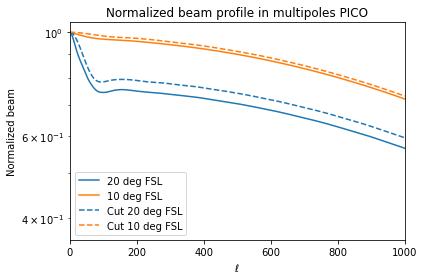

In [15]:

plt.plot(np.arange(3*Nside+1),bl20FSL_PICO)
plt.plot(np.arange(3*Nside+1),bl10FSL_PICO)
plt.plot(np.arange(3*Nside+1),cutbl20FSL_PICO,c='C0',linestyle='dashed')
plt.plot(np.arange(3*Nside+1),cutbl10FSL_PICO,c='C1',linestyle='dashed')
plt.title('Normalized beam profile in multipoles PICO')
plt.xlabel(r'$\ell$')
plt.ylabel('Normalized beam')
plt.legend(['20 deg FSL','10 deg FSL','Cut 20 deg FSL','Cut 10 deg FSL'])
plt.yscale('log')
plt.xlim([0,1000])

In [21]:
#Smoothing the d1 s1 fore ground IQU, 223GHz PICO
map_223GHz_sm20FSL_PICO=hp.sphtfunc.smoothing(map_223GHz,beam_window=bl20FSL_PICO)
map_223GHz_sm10FSL_PICO=hp.sphtfunc.smoothing(map_223GHz,beam_window=bl10FSL_PICO)
map_223GHz_smcut20FSL_PICO=hp.sphtfunc.smoothing(map_223GHz,beam_window=cutbl20FSL_PICO)
map_223GHz_smcut10FSL_PICO=hp.sphtfunc.smoothing(map_223GHz,beam_window=cutbl10FSL_PICO)
map_223GHz_sm15FSL_PICO=hp.sphtfunc.smoothing(map_223GHz,beam_window=bl15FSL_PICO)
map_223GHz_smcut15FSL_PICO=hp.sphtfunc.smoothing(map_223GHz,beam_window=cutbl15FSL_PICO)

#Smoothing the d1 s1 fore ground IQU, 155GHz PICO
map_155GHz_sm20FSL_PICO=hp.sphtfunc.smoothing(map_155GHz,beam_window=bl20FSL_PICO)
map_155GHz_sm10FSL_PICO=hp.sphtfunc.smoothing(map_155GHz,beam_window=bl10FSL_PICO)
map_155GHz_smcut20FSL_PICO=hp.sphtfunc.smoothing(map_155GHz,beam_window=cutbl20FSL_PICO)
map_155GHz_smcut10FSL_PICO=hp.sphtfunc.smoothing(map_155GHz,beam_window=cutbl10FSL_PICO)
map_155GHz_sm15FSL_PICO=hp.sphtfunc.smoothing(map_155GHz,beam_window=bl15FSL_PICO)
map_155GHz_smcut15FSL_PICO=hp.sphtfunc.smoothing(map_155GHz,beam_window=cutbl15FSL_PICO)


#Smoothing the d1 s1 fore ground IQU, 90GHz PICO
map_90GHz_sm20FSL_PICO=hp.sphtfunc.smoothing(map_90GHz,beam_window=bl20FSL_PICO)
map_90GHz_sm10FSL_PICO=hp.sphtfunc.smoothing(map_90GHz,beam_window=bl10FSL_PICO)
map_90GHz_smcut20FSL_PICO=hp.sphtfunc.smoothing(map_90GHz,beam_window=cutbl20FSL_PICO)
map_90GHz_smcut10FSL_PICO=hp.sphtfunc.smoothing(map_90GHz,beam_window=cutbl10FSL_PICO)
map_90GHz_sm15FSL_PICO=hp.sphtfunc.smoothing(map_90GHz,beam_window=bl15FSL_PICO)
map_90GHz_smcut15FSL_PICO=hp.sphtfunc.smoothing(map_90GHz,beam_window=cutbl15FSL_PICO)




#noises, caused buty inaccurate beam cut, namely the difference
noises_map_223GHz_20FSL_PICO=map_223GHz_sm20FSL_PICO-map_223GHz_smcut20FSL_PICO
noises_map_223GHz_10FSL_PICO=map_223GHz_sm10FSL_PICO-map_223GHz_smcut10FSL_PICO
noises_map_223GHz_15FSL_PICO=map_223GHz_sm15FSL_PICO-map_223GHz_smcut15FSL_PICO

noises_map_155GHz_20FSL_PICO=map_155GHz_sm20FSL_PICO-map_155GHz_smcut20FSL_PICO
noises_map_155GHz_10FSL_PICO=map_155GHz_sm10FSL_PICO-map_155GHz_smcut10FSL_PICO
noises_map_155GHz_15FSL_PICO=map_155GHz_sm15FSL_PICO-map_155GHz_smcut15FSL_PICO

noises_map_90GHz_20FSL_PICO=map_90GHz_sm20FSL_PICO-map_90GHz_smcut20FSL_PICO
noises_map_90GHz_10FSL_PICO=map_90GHz_sm10FSL_PICO-map_90GHz_smcut10FSL_PICO
noises_map_90GHz_15FSL_PICO=map_90GHz_sm15FSL_PICO-map_90GHz_smcut15FSL_PICO





noises_map_223GHz_20FSL_mmasked_PICO=noises_map_223GHz_20FSL_PICO*m_apomask
noises_map_223GHz_10FSL_mmasked_PICO=noises_map_223GHz_10FSL_PICO*m_apomask
noises_map_223GHz_15FSL_mmasked_PICO=noises_map_223GHz_15FSL_PICO*m_apomask

noises_map_155GHz_20FSL_mmasked_PICO=noises_map_155GHz_20FSL_PICO*m_apomask
noises_map_155GHz_10FSL_mmasked_PICO=noises_map_155GHz_10FSL_PICO*m_apomask
noises_map_155GHz_15FSL_mmasked_PICO=noises_map_155GHz_15FSL_PICO*m_apomask

noises_map_90GHz_20FSL_mmasked_PICO=noises_map_90GHz_20FSL_PICO*m_apomask
noises_map_90GHz_10FSL_mmasked_PICO=noises_map_90GHz_10FSL_PICO*m_apomask
noises_map_90GHz_15FSL_mmasked_PICO=noises_map_90GHz_15FSL_PICO*m_apomask

In [22]:
#to TEB
noises_map_223GHz_20FSL_mmasked_TEB_PICO=hp.anafast(noises_map_223GHz_20FSL_mmasked_PICO,pol=True)  
noises_map_223GHz_10FSL_mmasked_TEB_PICO=hp.anafast(noises_map_223GHz_10FSL_mmasked_PICO,pol=True)  
noises_map_223GHz_15FSL_mmasked_TEB_PICO=hp.anafast(noises_map_223GHz_15FSL_mmasked_PICO,pol=True)  

noises_map_155GHz_20FSL_mmasked_TEB_PICO=hp.anafast(noises_map_155GHz_20FSL_mmasked_PICO,pol=True)  
noises_map_155GHz_10FSL_mmasked_TEB_PICO=hp.anafast(noises_map_155GHz_10FSL_mmasked_PICO,pol=True)
noises_map_155GHz_15FSL_mmasked_TEB_PICO=hp.anafast(noises_map_155GHz_15FSL_mmasked_PICO,pol=True)

noises_map_90GHz_20FSL_mmasked_TEB_PICO=hp.anafast(noises_map_90GHz_20FSL_mmasked_PICO,pol=True)  
noises_map_90GHz_10FSL_mmasked_TEB_PICO=hp.anafast(noises_map_90GHz_10FSL_mmasked_PICO,pol=True)
noises_map_90GHz_15FSL_mmasked_TEB_PICO=hp.anafast(noises_map_90GHz_15FSL_mmasked_PICO,pol=True)

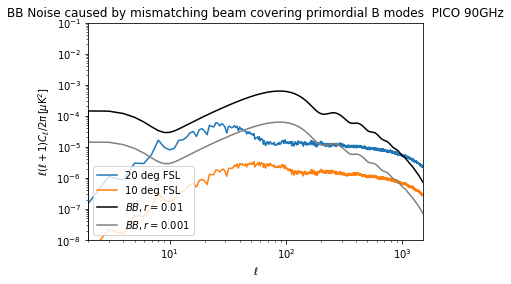

In [23]:
#ideal antenna with FWHM, for B-mode convolution for the comparison
res_PICO=6.2 #In arcmin, typically for pico
FWHM_PICOP=0.000290888209*res_PICO
sigma_PICOP=FWHM_PICOP/(2*np.sqrt(2*np.log(2)))

def ant(ls):
    return np.exp(-ls*(ls+1)*sigma_PICOP*sigma_PICOP)


ls = np.arange(3*Nside)
plt.plot(ls,ls*(ls+1)*noises_map_90GHz_20FSL_mmasked_TEB_PICO[2]/2/np.pi,c='C0')
plt.plot(ls,ls*(ls+1)*noises_map_90GHz_10FSL_mmasked_TEB_PICO[2]/2/np.pi,c='C1')
plt.plot(np.arange(1501),cl56[:,2]*ant(np.arange(1501)),'black')
plt.plot(np.arange(1501),cl01[:,2]*ant(np.arange(1501)),'grey')
plt.title('BB Noise caused by mismatching beam covering primordial B modes  PICO 90GHz')
plt.xlim([2,1500])
plt.ylim([0.00000001,0.1])
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi\,[\mu {\rm K}^2]$')
plt.legend(['20 deg FSL','10 deg FSL','$BB, r = 0.01$','$BB, r = 0.001$'], loc='lower left');
plt.xlabel(r'$\ell$');
plt.show()


In [24]:
%store noises_map_223GHz_10FSL_mmasked_TEB_PICO
%store noises_map_223GHz_20FSL_mmasked_TEB_PICO
%store noises_map_223GHz_15FSL_mmasked_TEB_PICO
%store noises_map_155GHz_10FSL_mmasked_TEB_PICO
%store noises_map_155GHz_20FSL_mmasked_TEB_PICO
%store noises_map_155GHz_15FSL_mmasked_TEB_PICO
%store noises_map_90GHz_10FSL_mmasked_TEB_PICO
%store noises_map_90GHz_20FSL_mmasked_TEB_PICO
%store noises_map_90GHz_15FSL_mmasked_TEB_PICO

Stored 'noises_map_223GHz_10FSL_mmasked_TEB_PICO' (ndarray)
Stored 'noises_map_223GHz_20FSL_mmasked_TEB_PICO' (ndarray)
Stored 'noises_map_223GHz_15FSL_mmasked_TEB_PICO' (ndarray)
Stored 'noises_map_155GHz_10FSL_mmasked_TEB_PICO' (ndarray)
Stored 'noises_map_155GHz_20FSL_mmasked_TEB_PICO' (ndarray)
Stored 'noises_map_155GHz_15FSL_mmasked_TEB_PICO' (ndarray)
Stored 'noises_map_90GHz_10FSL_mmasked_TEB_PICO' (ndarray)
Stored 'noises_map_90GHz_20FSL_mmasked_TEB_PICO' (ndarray)
Stored 'noises_map_90GHz_15FSL_mmasked_TEB_PICO' (ndarray)
